In [91]:
%load_ext autoreload
%autoreload 2
import sys
# sys.path.append(r'E:/0code')
sys.path.append(r'/BIGDATA1/nsccgz_yfdu_1/asc19/wyf/0code/mylearn')
sys.path.append(r'/BIGDATA1/nsccgz_yfdu_1/asc19/wyf/0code')
# sys.path.append('/Users/yanbin/Documents/Projects/AI-Middle-Project/')
# sys.path.append('/Users/yanbin/Documents/Projects/mylearn')

# sys.path.append('/home/wyf/0code/AI-Middle-Project/')
# sys.path.append('/home/wyf/0code/mylearn')
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from logger import get_logger
from neural_network import MLPClassifier
from pyml.model_selection import KFold
from pyml.model_selection import ShuffleSplit
from pyml.metrics.classification import precision_score


mylogger = get_logger(__name__)
mylogger.debug('hello world')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
[DEBUG] <ipython-input-91-3022292ecbf0> <ipython-input-91-3022292ecbf0> - <module> line 24 - 
hello world
 - (2018-10-21 08:29:49)



# 读取数据

In [12]:
train_X_vec2doc_2 = np.load('../data/wyf-train_X-doc2vec-500.npy')
test_X_vec2doc_2 = np.load('../data/wyf-test_X-doc2vec-500.npy')

In [13]:
train_X_vec2doc = np.load('../data/clean/trainX_vec2doc-24000-500.npy')
test_X_vec2doc = np.load('../data/clean/testX_vec2doc-6000-500.npy')

In [14]:
train_X_tfidf = np.load('../data/clean/trainX_tfidf-24000-62761.npy')
test_X_tfidf = np.load('../data/clean/testX_tfidf-6000-62761.npy')

In [15]:
train_X_onehot = np.load('../data/clean/trainX_onehot-24000-62761.npy')
test_X_onehot = np.load('../data/clean/testX_onthot-6000-62761.npy')

In [35]:
train_ori_Y = np.load('../data/clean/trainY_24000.npy')

# 使用vec2doc_2进行交叉验证

## 测试单层

In [65]:
train_X = train_X_vec2doc_2.T
test_X = test_X_vec2doc_2.T
train_Y  = train_ori_Y.reshape((-1,1))
train_X.shape,train_Y.shape,test_X.shape

((500, 24000), (24000, 1), (500, 6000))

In [66]:
train_X = pd.DataFrame(train_X)
test_X = pd.DataFrame(test_X)
train_Y = pd.DataFrame(train_Y)
train_X.shape,train_Y.shape,test_X.shape

((500, 24000), (24000, 1), (500, 6000))

In [78]:
learning_rates = [0.5, 0.3, 0.1, 0.05, 0.02, 0.01]

n_splits = 1
ms = ShuffleSplit(n_splits=n_splits,test_size=0.2)
models = []
for train_indices, valid_indices in ms.split(train_X_vec2doc_2):
    for learning_rate in learning_rates:
        train_train_X = train_X.iloc[:,train_indices]
        train_train_Y = train_Y.iloc[train_indices,:]
        train_valid_X = train_X.iloc[:,valid_indices]
        train_valid_Y = train_Y.iloc[valid_indices,:]
        mlpc = MLPClassifier(verbose=False, 
            # 忽略输入和输出层。中间层的结点数。例如 本例子为 input -> 4 -> 2（2分类）
            hidden_layer_sizes=(4,), 
            activation='relu', # 'relu', 'sigmoid'. 更多函数，等待支持
            max_iter=500, # 迭代次数
            learning_rate_init=learning_rate, 
            warm_start=True,  # True就好了
            mini_batch='auto', # 保持auto
            step_size=10, # 多少个iteration后，才进行“输出loss”，输出“准确度”，保存模型文件，这三个操作?
            load_from_file=False, # 读文件恢复模型吗
            dump_file=False, # 要不要把模型写入文件？
            validation_set=(train_valid_X, train_valid_Y) # 要不要给一个validation set？（仅用来输出这个集合的准确度)
        )
        mlpc.fit(train_train_X, train_train_Y)
        r = mlpc.score(train_valid_X, train_valid_Y)
        models.append(mlpc)
        print(r)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[0] loss 0.7226078198658392
 - (2018-10-21 02:48:25)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.5016666666666667, training score 0.4947916666666667
 - (2018-10-21 02:48:26)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[10] loss 0.6845326033742531
 - (2018-10-21 02:48:26)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.5745833333333333, training score 0.5583333333333333
 - (2018-10-21 02:48:27)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[20] loss 0.6658487053269575
 - (2018-10-21 02:48:27)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.6320833333333333, training score 0.6296875
 - (2018-10-21 02:48:28)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[30] loss 0.6258705013

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.851875, training score 0.8765625
 - (2018-10-21 02:48:57)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[280] loss 0.3078605892835011
 - (2018-10-21 02:48:57)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8514583333333333, training score 0.8765625
 - (2018-10-21 02:48:58)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[290] loss 0.3129299282409468
 - (2018-10-21 02:48:58)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.85125, training score 0.8619791666666666
 - (2018-10-21 02:48:59)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[300] loss 0.31410828513668726
 - (2018-10-21 02:49:00)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.850625, training score 0.876

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[50] loss 0.6216509203679235
 - (2018-10-21 02:49:32)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.6897916666666667, training score 0.7088541666666667
 - (2018-10-21 02:49:33)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[60] loss 0.5896954475523176
 - (2018-10-21 02:49:33)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.7422916666666667, training score 0.7380208333333333
 - (2018-10-21 02:49:34)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[70] loss 0.5173016584055045
 - (2018-10-21 02:49:34)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.7802083333333333, training score 0.7838541666666666
 - (2018-10-21 02:49:35)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[80] loss 0.

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8520833333333333, training score 0.8666666666666667
 - (2018-10-21 02:50:03)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[330] loss 0.30894665529241017
 - (2018-10-21 02:50:04)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8520833333333333, training score 0.8708333333333333
 - (2018-10-21 02:50:05)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[340] loss 0.3093826371339844
 - (2018-10-21 02:50:05)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.85125, training score 0.8713541666666667
 - (2018-10-21 02:50:06)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[350] loss 0.3072604398206754
 - (2018-10-21 02:50:06)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[100] loss 0.6749736283956375
 - (2018-10-21 02:50:35)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.62625, training score 0.5875
 - (2018-10-21 02:50:36)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[110] loss 0.6652985464552384
 - (2018-10-21 02:50:36)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.6370833333333333, training score 0.6234375
 - (2018-10-21 02:50:37)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[120] loss 0.6525958100591808
 - (2018-10-21 02:50:37)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.6516666666666666, training score 0.6583333333333333
 - (2018-10-21 02:50:38)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[130] loss 0.65156701008722
 - (2018-10-2

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[380] loss 0.3395663743029631
 - (2018-10-21 02:51:08)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8452083333333333, training score 0.8583333333333333
 - (2018-10-21 02:51:09)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[390] loss 0.33799139018049773
 - (2018-10-21 02:51:10)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8460416666666667, training score 0.8630208333333333
 - (2018-10-21 02:51:10)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[400] loss 0.32468549554144727
 - (2018-10-21 02:51:11)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.84625, training score 0.8645833333333334
 - (2018-10-21 02:51:11)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[410] loss 0.33102

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[160] loss 0.6793723922034081
 - (2018-10-21 02:51:41)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.6014583333333333, training score 0.590625
 - (2018-10-21 02:51:42)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[170] loss 0.6746203183407874
 - (2018-10-21 02:51:42)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.6077083333333333, training score 0.5942708333333333
 - (2018-10-21 02:51:43)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[180] loss 0.675915081363558
 - (2018-10-21 02:51:43)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.6129166666666667, training score 0.5947916666666667
 - (2018-10-21 02:51:44)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[190] loss 0.6714902

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.783125, training score 0.7848958333333333
 - (2018-10-21 02:52:15)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[440] loss 0.5115168144956901
 - (2018-10-21 02:52:16)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.7858333333333334, training score 0.7760416666666666
 - (2018-10-21 02:52:17)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[450] loss 0.4986512743668816
 - (2018-10-21 02:52:17)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.7908333333333334, training score 0.8015625
 - (2018-10-21 02:52:18)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[460] loss 0.4748283079018164
 - (2018-10-21 02:52:18)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.795208333

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[210] loss 0.6905601069529307
 - (2018-10-21 02:52:48)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.561875, training score 0.521875
 - (2018-10-21 02:52:48)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[220] loss 0.6903714672021632
 - (2018-10-21 02:52:49)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.5645833333333333, training score 0.5453125
 - (2018-10-21 02:52:50)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[230] loss 0.6879345959356099
 - (2018-10-21 02:52:50)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.5670833333333334, training score 0.5479166666666667
 - (2018-10-21 02:52:51)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[240] loss 0.6851046385305485
 - (2018

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[490] loss 0.6688029615088966
 - (2018-10-21 02:53:20)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.6210416666666667, training score 0.6182291666666667
 - (2018-10-21 02:53:20)

0.6235416666666667
[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[0] loss 0.7226078198658392
 - (2018-10-21 02:53:21)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.49833333333333335, training score 0.48854166666666665
 - (2018-10-21 02:53:22)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[10] loss 0.7102469099302433
 - (2018-10-21 02:53:22)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.4970833333333333, training score 0.5
 - (2018-10-21 02:53:23)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[20] l

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[270] loss 0.693538283496982
 - (2018-10-21 02:53:52)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.5445833333333333, training score 0.5036458333333333
 - (2018-10-21 02:53:53)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[280] loss 0.6914195454082379
 - (2018-10-21 02:53:53)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.5477083333333334, training score 0.5239583333333333
 - (2018-10-21 02:53:54)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[290] loss 0.6931618134973401
 - (2018-10-21 02:53:54)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.5495833333333333, training score 0.5369791666666667
 - (2018-10-21 02:53:55)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[300] loss

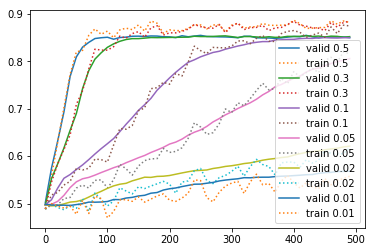

In [79]:
for i,model in enumerate(models):
    m = model.information
    num_iterations = list(m.keys())
    costs = [m[i][0]  for i in num_iterations]
    valid_scores = [m[i][1]  for i in num_iterations]
    train_scores = [m[i][2]  for i in num_iterations]
    plt.plot(num_iterations, valid_scores, '-', label='valid '+ str(learning_rates[i]))
    plt.plot(num_iterations, train_scores, ':', label='train '+ str(learning_rates[i]))
    plt.legend()

## 更多的隐藏层节点

In [80]:
learning_rate = 0.1
hidden_sizes = range(2, 41, 5)
n_splits = 1
ms = ShuffleSplit(n_splits=n_splits,test_size=0.2)
models_3 = []
for train_indices, valid_indices in ms.split(train_X_vec2doc_2):
    for hidden_size in hidden_sizes:
        train_train_X = train_X.iloc[:,train_indices]
        train_train_Y = train_Y.iloc[train_indices,:]
        train_valid_X = train_X.iloc[:,valid_indices]
        train_valid_Y = train_Y.iloc[valid_indices,:]
        mlpc = MLPClassifier(verbose=False, 
            # 忽略输入和输出层。中间层的结点数。例如 本例子为 input -> 4 -> 2（2分类）
            hidden_layer_sizes=(hidden_size,), 
            activation='relu', # 'relu', 'sigmoid'. 更多函数，等待支持
            max_iter=5000, # 迭代次数
            learning_rate_init=learning_rate, 
            warm_start=True,  # True就好了
            mini_batch='auto', # 保持auto
            step_size=10, # 多少个iteration后，才进行“输出loss”，输出“准确度”，保存模型文件，这三个操作?
            load_from_file=False, # 读文件恢复模型吗
            dump_file=False, # 要不要把模型写入文件？
            validation_set=(train_valid_X, train_valid_Y) # 要不要给一个validation set？（仅用来输出这个集合的准确度)
        )
        mlpc.fit(train_train_X, train_train_Y)
        r = mlpc.score(train_valid_X, train_valid_Y)
        models_3.append(mlpc)
        print(r)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[0] loss 0.7100884642261065
 - (2018-10-21 03:55:43)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.49145833333333333, training score 0.5078125
 - (2018-10-21 03:55:43)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[10] loss 0.6961493255253426
 - (2018-10-21 03:55:44)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.49166666666666664, training score 0.4942708333333333
 - (2018-10-21 03:55:45)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[20] loss 0.6899781708346716
 - (2018-10-21 03:55:45)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.4945833333333333, training score 0.49322916666666666
 - (2018-10-21 03:55:46)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[30] loss 0.6871117

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.80375, training score 0.7984375
 - (2018-10-21 03:56:15)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[280] loss 0.4455713316649123
 - (2018-10-21 03:56:15)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8110416666666667, training score 0.8036458333333333
 - (2018-10-21 03:56:16)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[290] loss 0.423927077495116
 - (2018-10-21 03:56:16)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8154166666666667, training score 0.8223958333333333
 - (2018-10-21 03:56:17)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[300] loss 0.3925621822158903
 - (2018-10-21 03:56:18)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.82083333333

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[550] loss 0.3173356822480058
 - (2018-10-21 03:56:45)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.85, training score 0.8645833333333334
 - (2018-10-21 03:56:46)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[560] loss 0.339312745777146
 - (2018-10-21 03:56:46)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8520833333333333, training score 0.8578125
 - (2018-10-21 03:56:47)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[570] loss 0.3350272022180366
 - (2018-10-21 03:56:47)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.851875, training score 0.8604166666666667
 - (2018-10-21 03:56:48)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[580] loss 0.34929207606006296
 - (2018-10-

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8533333333333334, training score 0.8677083333333333
 - (2018-10-21 03:57:15)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[830] loss 0.31906261305833716
 - (2018-10-21 03:57:15)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8527083333333333, training score 0.878125
 - (2018-10-21 03:57:16)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[840] loss 0.3232572794015905
 - (2018-10-21 03:57:16)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8527083333333333, training score 0.8651041666666667
 - (2018-10-21 03:57:17)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[850] loss 0.30373782185048187
 - (2018-10-21 03:57:17)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[1100] loss 0.2994477410405795
 - (2018-10-21 03:57:44)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8527083333333333, training score 0.875
 - (2018-10-21 03:57:45)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[1110] loss 0.30728861203911634
 - (2018-10-21 03:57:45)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.85375, training score 0.8770833333333333
 - (2018-10-21 03:57:46)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[1120] loss 0.3046384972905546
 - (2018-10-21 03:57:46)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.855, training score 0.8760416666666667
 - (2018-10-21 03:57:47)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[1130] loss 0.33539268483665996
 - (2018-1

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.854375, training score 0.8802083333333334
 - (2018-10-21 03:58:14)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[1380] loss 0.3011777571194588
 - (2018-10-21 03:58:15)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8545833333333334, training score 0.871875
 - (2018-10-21 03:58:15)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[1390] loss 0.2799170698016571
 - (2018-10-21 03:58:16)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8529166666666667, training score 0.8838541666666667
 - (2018-10-21 03:58:16)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[1400] loss 0.2916817482594684
 - (2018-10-21 03:58:17)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8533333

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[1650] loss 0.29842775866142596
 - (2018-10-21 03:58:44)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8527083333333333, training score 0.8796875
 - (2018-10-21 03:58:45)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[1660] loss 0.29881113141316007
 - (2018-10-21 03:58:45)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8535416666666666, training score 0.8807291666666667
 - (2018-10-21 03:58:46)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[1670] loss 0.2898883253841614
 - (2018-10-21 03:58:47)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.853125, training score 0.8776041666666666
 - (2018-10-21 03:58:47)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[1680] loss 0.302890031

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8547916666666666, training score 0.878125
 - (2018-10-21 03:59:15)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[1930] loss 0.3192114635894429
 - (2018-10-21 03:59:15)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8560416666666667, training score 0.8666666666666667
 - (2018-10-21 03:59:16)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[1940] loss 0.30443012396914815
 - (2018-10-21 03:59:16)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8560416666666667, training score 0.8682291666666667
 - (2018-10-21 03:59:17)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[1950] loss 0.30634297262864446
 - (2018-10-21 03:59:18)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation sco

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[2200] loss 0.30095674374310943
 - (2018-10-21 03:59:45)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8522916666666667, training score 0.8791666666666667
 - (2018-10-21 03:59:45)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[2210] loss 0.28145855705767997
 - (2018-10-21 03:59:46)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.851875, training score 0.8833333333333333
 - (2018-10-21 03:59:46)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[2220] loss 0.28457025510122175
 - (2018-10-21 03:59:47)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8533333333333334, training score 0.8864583333333333
 - (2018-10-21 03:59:47)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[2230] loss 0

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8520833333333333, training score 0.871875
 - (2018-10-21 04:00:14)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[2480] loss 0.3096889563673574
 - (2018-10-21 04:00:15)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8520833333333333, training score 0.8703125
 - (2018-10-21 04:00:16)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[2490] loss 0.3001441566038049
 - (2018-10-21 04:00:16)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8527083333333333, training score 0.875
 - (2018-10-21 04:00:17)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[2500] loss 0.27999516185529505
 - (2018-10-21 04:00:17)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8522916666666667, 

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[2750] loss 0.3132326801770038
 - (2018-10-21 04:00:45)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8510416666666667, training score 0.8645833333333334
 - (2018-10-21 04:00:46)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[2760] loss 0.30800685050999577
 - (2018-10-21 04:00:47)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8520833333333333, training score 0.8692708333333333
 - (2018-10-21 04:00:47)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[2770] loss 0.30654378680384997
 - (2018-10-21 04:00:48)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8520833333333333, training score 0.875
 - (2018-10-21 04:00:49)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[2780] loss 0.303

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8508333333333333, training score 0.8854166666666666
 - (2018-10-21 04:01:16)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[3030] loss 0.2743396392705436
 - (2018-10-21 04:01:16)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8514583333333333, training score 0.8953125
 - (2018-10-21 04:01:17)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[3040] loss 0.30172815438946493
 - (2018-10-21 04:01:17)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.853125, training score 0.8796875
 - (2018-10-21 04:01:18)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[3050] loss 0.2858063611713221
 - (2018-10-21 04:01:18)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.85104166666666

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[3300] loss 0.3325107754816344
 - (2018-10-21 04:01:45)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8516666666666667, training score 0.865625
 - (2018-10-21 04:01:46)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[3310] loss 0.29745400576209025
 - (2018-10-21 04:01:46)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.853125, training score 0.884375
 - (2018-10-21 04:01:47)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[3320] loss 0.3258350514841682
 - (2018-10-21 04:01:48)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8522916666666667, training score 0.8609375
 - (2018-10-21 04:01:48)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[3330] loss 0.30557678272009314
 - (2018-10-

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[3580] loss 0.2963806813859612
 - (2018-10-21 04:02:16)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8502083333333333, training score 0.8802083333333334
 - (2018-10-21 04:02:17)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[3590] loss 0.32112979528717667
 - (2018-10-21 04:02:17)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8514583333333333, training score 0.8713541666666667
 - (2018-10-21 04:02:18)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[3600] loss 0.302293758920374
 - (2018-10-21 04:02:18)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.851875, training score 0.8703125
 - (2018-10-21 04:02:19)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[3610] loss 0.30426901843

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.851875, training score 0.8760416666666667
 - (2018-10-21 04:02:46)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[3860] loss 0.29760865791152136
 - (2018-10-21 04:02:46)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.85125, training score 0.8755208333333333
 - (2018-10-21 04:02:47)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[3870] loss 0.30525440598926834
 - (2018-10-21 04:02:47)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8508333333333333, training score 0.8703125
 - (2018-10-21 04:02:48)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[3880] loss 0.3017643074205001
 - (2018-10-21 04:02:48)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.851666666666666

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8522916666666667, training score 0.8807291666666667
 - (2018-10-21 04:03:16)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[4140] loss 0.2991432671903099
 - (2018-10-21 04:03:16)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8520833333333333, training score 0.88125
 - (2018-10-21 04:03:17)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[4150] loss 0.2900355242627702
 - (2018-10-21 04:03:17)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8525, training score 0.8828125
 - (2018-10-21 04:03:18)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[4160] loss 0.31069281189749653
 - (2018-10-21 04:03:18)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8527083333333333, 

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[4410] loss 0.32390035104920833
 - (2018-10-21 04:03:46)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8529166666666667, training score 0.8630208333333333
 - (2018-10-21 04:03:46)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[4420] loss 0.31271116636574686
 - (2018-10-21 04:03:47)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8516666666666667, training score 0.865625
 - (2018-10-21 04:03:47)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[4430] loss 0.33018731281626684
 - (2018-10-21 04:03:48)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8533333333333334, training score 0.8598958333333333
 - (2018-10-21 04:03:48)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[4440] loss 0

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8516666666666667, training score 0.8713541666666667
 - (2018-10-21 04:04:15)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[4690] loss 0.31549534330159795
 - (2018-10-21 04:04:16)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8529166666666667, training score 0.8734375
 - (2018-10-21 04:04:16)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[4700] loss 0.29934911127448166
 - (2018-10-21 04:04:17)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8520833333333333, training score 0.8807291666666667
 - (2018-10-21 04:04:18)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[4710] loss 0.2907454878940767
 - (2018-10-21 04:04:18)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation sc

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[4960] loss 0.30818677690362145
 - (2018-10-21 04:04:45)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8527083333333333, training score 0.8677083333333333
 - (2018-10-21 04:04:46)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[4970] loss 0.31207490216914313
 - (2018-10-21 04:04:46)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8529166666666667, training score 0.8713541666666667
 - (2018-10-21 04:04:47)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[4980] loss 0.3032477553753618
 - (2018-10-21 04:04:47)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.85375, training score 0.8796875
 - (2018-10-21 04:04:48)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[4990] loss 0.3094692814

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.796875, training score 0.821875
 - (2018-10-21 04:05:19)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[240] loss 0.4541969831771172
 - (2018-10-21 04:05:19)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.801875, training score 0.8041666666666667
 - (2018-10-21 04:05:20)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[250] loss 0.43610676529531806
 - (2018-10-21 04:05:21)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8058333333333333, training score 0.8208333333333333
 - (2018-10-21 04:05:21)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[260] loss 0.42004853167133915
 - (2018-10-21 04:05:22)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.810625, training s

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[510] loss 0.3388628578632147
 - (2018-10-21 04:05:53)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.85125, training score 0.8536458333333333
 - (2018-10-21 04:05:53)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[520] loss 0.34034351264394885
 - (2018-10-21 04:05:54)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8514583333333333, training score 0.8557291666666667
 - (2018-10-21 04:05:55)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[530] loss 0.3206446167574886
 - (2018-10-21 04:05:55)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.85125, training score 0.8578125
 - (2018-10-21 04:05:56)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[540] loss 0.32902022167308725
 - (2018

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[790] loss 0.3145492779968124
 - (2018-10-21 04:06:27)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8520833333333333, training score 0.8645833333333334
 - (2018-10-21 04:06:28)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[800] loss 0.31548493382595494
 - (2018-10-21 04:06:28)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.851875, training score 0.8645833333333334
 - (2018-10-21 04:06:29)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[810] loss 0.31146225542104133
 - (2018-10-21 04:06:30)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8520833333333333, training score 0.8692708333333333
 - (2018-10-21 04:06:30)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[820] loss 0.3354

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8545833333333334, training score 0.8640625
 - (2018-10-21 04:07:02)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[1070] loss 0.3013535092992184
 - (2018-10-21 04:07:02)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8554166666666667, training score 0.878125
 - (2018-10-21 04:07:03)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[1080] loss 0.2904763141212018
 - (2018-10-21 04:07:03)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.855625, training score 0.8828125
 - (2018-10-21 04:07:04)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[1090] loss 0.3044141599620403
 - (2018-10-21 04:07:05)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8547916666666666, trainin

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[1340] loss 0.29629116485967
 - (2018-10-21 04:07:35)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8541666666666666, training score 0.875
 - (2018-10-21 04:07:36)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[1350] loss 0.30585041482425435
 - (2018-10-21 04:07:37)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.854375, training score 0.86875
 - (2018-10-21 04:07:37)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[1360] loss 0.29166293907375945
 - (2018-10-21 04:07:38)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.85375, training score 0.8817708333333333
 - (2018-10-21 04:07:38)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[1370] loss 0.30260313103517106
 - (2018-10-21 04:0

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[1620] loss 0.3146514995280018
 - (2018-10-21 04:08:11)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8545833333333334, training score 0.8713541666666667
 - (2018-10-21 04:08:12)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[1630] loss 0.31470529793988444
 - (2018-10-21 04:08:12)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8545833333333334, training score 0.8666666666666667
 - (2018-10-21 04:08:13)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[1640] loss 0.2941303753276087
 - (2018-10-21 04:08:14)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8539583333333334, training score 0.8802083333333334
 - (2018-10-21 04:08:14)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[1650

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.853125, training score 0.8619791666666666
 - (2018-10-21 04:08:45)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[1900] loss 0.3485744572582408
 - (2018-10-21 04:08:46)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8535416666666666, training score 0.8578125
 - (2018-10-21 04:08:47)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[1910] loss 0.29894838774965304
 - (2018-10-21 04:08:47)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8533333333333334, training score 0.8791666666666667
 - (2018-10-21 04:08:48)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[1920] loss 0.3125985956135891
 - (2018-10-21 04:08:48)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.85270

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[2170] loss 0.31724888838704796
 - (2018-10-21 04:09:19)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8535416666666666, training score 0.865625
 - (2018-10-21 04:09:20)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[2180] loss 0.300356240052668
 - (2018-10-21 04:09:20)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.85375, training score 0.86875
 - (2018-10-21 04:09:21)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[2190] loss 0.29583355139452167
 - (2018-10-21 04:09:22)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8529166666666667, training score 0.8875
 - (2018-10-21 04:09:22)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[2200] loss 0.297394606825914
 - (2018-10-21 04:0

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.853125, training score 0.8598958333333333
 - (2018-10-21 04:09:55)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[2450] loss 0.28414137327965855
 - (2018-10-21 04:09:56)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8525, training score 0.8927083333333333
 - (2018-10-21 04:09:56)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[2460] loss 0.30634578811718355
 - (2018-10-21 04:09:57)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8527083333333333, training score 0.8729166666666667
 - (2018-10-21 04:09:58)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[2470] loss 0.28385359245027725
 - (2018-10-21 04:09:58)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.852291

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8522916666666667, training score 0.8692708333333333
 - (2018-10-21 04:10:30)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[2730] loss 0.3038131334299044
 - (2018-10-21 04:10:31)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8525, training score 0.8755208333333333
 - (2018-10-21 04:10:32)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[2740] loss 0.27905905970830863
 - (2018-10-21 04:10:32)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8525, training score 0.88125
 - (2018-10-21 04:10:33)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[2750] loss 0.31045403923314957
 - (2018-10-21 04:10:33)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8522916666666667, tr

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[3000] loss 0.32698661162369796
 - (2018-10-21 04:11:04)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8529166666666667, training score 0.8661458333333333
 - (2018-10-21 04:11:05)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[3010] loss 0.29436609687172893
 - (2018-10-21 04:11:05)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8529166666666667, training score 0.8755208333333333
 - (2018-10-21 04:11:06)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[3020] loss 0.3095751502577476
 - (2018-10-21 04:11:06)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8535416666666666, training score 0.8671875
 - (2018-10-21 04:11:07)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[3030] loss 0

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[3280] loss 0.2925822773277865
 - (2018-10-21 04:11:39)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8514583333333333, training score 0.8822916666666667
 - (2018-10-21 04:11:40)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[3290] loss 0.29246484883335844
 - (2018-10-21 04:11:40)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.851875, training score 0.8723958333333334
 - (2018-10-21 04:11:41)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[3300] loss 0.3071624553391569
 - (2018-10-21 04:11:41)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8520833333333333, training score 0.8697916666666666
 - (2018-10-21 04:11:42)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[3310] loss 0.2

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8497916666666666, training score 0.8755208333333333
 - (2018-10-21 04:12:13)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[3560] loss 0.2716184671477369
 - (2018-10-21 04:12:13)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8527083333333333, training score 0.8864583333333333
 - (2018-10-21 04:12:14)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[3570] loss 0.32869686268365433
 - (2018-10-21 04:12:14)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8510416666666667, training score 0.8651041666666667
 - (2018-10-21 04:12:15)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[3580] loss 0.28730625904247586
 - (2018-10-21 04:12:16)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
vali

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[3830] loss 0.29190461467143813
 - (2018-10-21 04:12:46)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.851875, training score 0.8791666666666667
 - (2018-10-21 04:12:47)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[3840] loss 0.2842415156957622
 - (2018-10-21 04:12:48)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8525, training score 0.8854166666666666
 - (2018-10-21 04:12:48)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[3850] loss 0.2973278359304522
 - (2018-10-21 04:12:49)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8533333333333334, training score 0.8760416666666667
 - (2018-10-21 04:12:50)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[3860] loss 0.3050861068848

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8522916666666667, training score 0.871875
 - (2018-10-21 04:13:21)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[4110] loss 0.27087581971489494
 - (2018-10-21 04:13:21)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8522916666666667, training score 0.8885416666666667
 - (2018-10-21 04:13:22)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[4120] loss 0.2922154210058909
 - (2018-10-21 04:13:23)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8527083333333333, training score 0.878125
 - (2018-10-21 04:13:23)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[4130] loss 0.29488637126617584
 - (2018-10-21 04:13:24)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8525,

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[4380] loss 0.30697161544930235
 - (2018-10-21 04:13:55)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8508333333333333, training score 0.8755208333333333
 - (2018-10-21 04:13:55)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[4390] loss 0.28153528359350505
 - (2018-10-21 04:13:56)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8508333333333333, training score 0.8828125
 - (2018-10-21 04:13:57)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[4400] loss 0.2823623358164692
 - (2018-10-21 04:13:57)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.85125, training score 0.890625
 - (2018-10-21 04:13:58)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[4410] loss 0.29298023688598523
 -

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[4660] loss 0.3059943209564551
 - (2018-10-21 04:14:29)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8491666666666666, training score 0.86875
 - (2018-10-21 04:14:30)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[4670] loss 0.2946116239482347
 - (2018-10-21 04:14:31)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.85125, training score 0.8802083333333334
 - (2018-10-21 04:14:31)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[4680] loss 0.2998532407363855
 - (2018-10-21 04:14:32)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8502083333333333, training score 0.8848958333333333
 - (2018-10-21 04:14:33)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[4690] loss 0.27340786980082

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8514583333333333, training score 0.8848958333333333
 - (2018-10-21 04:15:03)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[4940] loss 0.29292148015555103
 - (2018-10-21 04:15:04)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8522916666666667, training score 0.8838541666666667
 - (2018-10-21 04:15:05)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[4950] loss 0.2749871331328678
 - (2018-10-21 04:15:05)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.85125, training score 0.88125
 - (2018-10-21 04:15:06)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[4960] loss 0.3114361277015283
 - (2018-10-21 04:15:06)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.85083333

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[210] loss 0.4384124470643022
 - (2018-10-21 04:15:40)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.7989583333333333, training score 0.8166666666666667
 - (2018-10-21 04:15:41)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[220] loss 0.43977472475611484
 - (2018-10-21 04:15:42)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8020833333333334, training score 0.8130208333333333
 - (2018-10-21 04:15:42)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[230] loss 0.41416389847539276
 - (2018-10-21 04:15:43)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8089583333333333, training score 0.8354166666666667
 - (2018-10-21 04:15:44)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[240] l

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[490] loss 0.33709652270279494
 - (2018-10-21 04:16:19)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8529166666666667, training score 0.85625
 - (2018-10-21 04:16:20)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[500] loss 0.32170197411919405
 - (2018-10-21 04:16:20)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.85375, training score 0.8703125
 - (2018-10-21 04:16:21)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[510] loss 0.3277068276557017
 - (2018-10-21 04:16:22)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8545833333333334, training score 0.8734375
 - (2018-10-21 04:16:23)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[520] loss 0.3218985112809969
 - (2018-10-21 04

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8570833333333333, training score 0.8651041666666667
 - (2018-10-21 04:16:57)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[770] loss 0.32670825391887204
 - (2018-10-21 04:16:58)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8579166666666667, training score 0.8697916666666666
 - (2018-10-21 04:16:59)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[780] loss 0.31447914934824084
 - (2018-10-21 04:16:59)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.85625, training score 0.8776041666666666
 - (2018-10-21 04:17:00)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[790] loss 0.3254298804294581
 - (2018-10-21 04:17:01)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[1040] loss 0.30122837421022575
 - (2018-10-21 04:17:34)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8566666666666667, training score 0.8760416666666667
 - (2018-10-21 04:17:35)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[1050] loss 0.30869432307877726
 - (2018-10-21 04:17:36)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.855625, training score 0.871875
 - (2018-10-21 04:17:36)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[1060] loss 0.29063944099930766
 - (2018-10-21 04:17:37)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8558333333333333, training score 0.8755208333333333
 - (2018-10-21 04:17:38)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[1070] loss 0.298645093

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8564583333333333, training score 0.8713541666666667
 - (2018-10-21 04:18:12)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[1320] loss 0.30853217121151544
 - (2018-10-21 04:18:12)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.85625, training score 0.8677083333333333
 - (2018-10-21 04:18:13)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[1330] loss 0.3323191898534498
 - (2018-10-21 04:18:14)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.85625, training score 0.8609375
 - (2018-10-21 04:18:14)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[1340] loss 0.3076935354776081
 - (2018-10-21 04:18:15)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.856875, training 

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[1590] loss 0.3087686501692997
 - (2018-10-21 04:18:49)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8554166666666667, training score 0.8744791666666667
 - (2018-10-21 04:18:49)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[1600] loss 0.3046489374166461
 - (2018-10-21 04:18:50)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8533333333333334, training score 0.8760416666666667
 - (2018-10-21 04:18:51)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[1610] loss 0.2948453801324735
 - (2018-10-21 04:18:51)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8554166666666667, training score 0.8776041666666666
 - (2018-10-21 04:18:52)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[1620]

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.855625, training score 0.8802083333333334
 - (2018-10-21 04:19:26)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[1870] loss 0.29121696227922744
 - (2018-10-21 04:19:27)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.855, training score 0.8802083333333334
 - (2018-10-21 04:19:27)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[1880] loss 0.3107893503137004
 - (2018-10-21 04:19:28)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8552083333333333, training score 0.8713541666666667
 - (2018-10-21 04:19:29)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[1890] loss 0.27516000871973484
 - (2018-10-21 04:19:29)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.85520833

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[2140] loss 0.29633368284063744
 - (2018-10-21 04:20:03)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8539583333333334, training score 0.8833333333333333
 - (2018-10-21 04:20:04)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[2150] loss 0.29253576605077225
 - (2018-10-21 04:20:05)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8541666666666666, training score 0.8828125
 - (2018-10-21 04:20:05)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[2160] loss 0.3030550929179709
 - (2018-10-21 04:20:06)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.855, training score 0.8817708333333333
 - (2018-10-21 04:20:07)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[2170] loss 0.284463723845

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8545833333333334, training score 0.8739583333333333
 - (2018-10-21 04:20:41)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[2420] loss 0.28432515681826254
 - (2018-10-21 04:20:41)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8545833333333334, training score 0.8864583333333333
 - (2018-10-21 04:20:42)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[2430] loss 0.30029592951611084
 - (2018-10-21 04:20:43)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.855, training score 0.8713541666666667
 - (2018-10-21 04:20:44)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[2440] loss 0.30080602301102793
 - (2018-10-21 04:20:44)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[2690] loss 0.29668596099670475
 - (2018-10-21 04:21:18)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8525, training score 0.8755208333333333
 - (2018-10-21 04:21:19)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[2700] loss 0.3166937351576987
 - (2018-10-21 04:21:19)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8525, training score 0.86875
 - (2018-10-21 04:21:20)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[2710] loss 0.3114191747251255
 - (2018-10-21 04:21:21)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8529166666666667, training score 0.8776041666666666
 - (2018-10-21 04:21:21)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[2720] loss 0.3064423477378914
 - (2018-

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[2970] loss 0.28099414231804803
 - (2018-10-21 04:21:56)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.854375, training score 0.8828125
 - (2018-10-21 04:21:56)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[2980] loss 0.29456623758764583
 - (2018-10-21 04:21:57)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8545833333333334, training score 0.8802083333333334
 - (2018-10-21 04:21:58)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[2990] loss 0.28159493054314966
 - (2018-10-21 04:21:58)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8545833333333334, training score 0.8989583333333333
 - (2018-10-21 04:21:59)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[3000] loss 0.30785747

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.85375, training score 0.8734375
 - (2018-10-21 04:22:33)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[3250] loss 0.3005404926000229
 - (2018-10-21 04:22:33)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8539583333333334, training score 0.875
 - (2018-10-21 04:22:34)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[3260] loss 0.2942689855240646
 - (2018-10-21 04:22:35)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.854375, training score 0.8734375
 - (2018-10-21 04:22:36)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[3270] loss 0.29630536914105815
 - (2018-10-21 04:22:36)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.85375, training score 0.86875
 - (2018

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[3520] loss 0.2900553903622348
 - (2018-10-21 04:23:10)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8533333333333334, training score 0.8817708333333333
 - (2018-10-21 04:23:11)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[3530] loss 0.2795948357368747
 - (2018-10-21 04:23:11)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8541666666666666, training score 0.8791666666666667
 - (2018-10-21 04:23:12)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[3540] loss 0.27364173993259555
 - (2018-10-21 04:23:13)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8535416666666666, training score 0.89375
 - (2018-10-21 04:23:14)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[3550] loss 0.29

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8527083333333333, training score 0.8755208333333333
 - (2018-10-21 04:23:47)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[3800] loss 0.29796337236530746
 - (2018-10-21 04:23:48)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8522916666666667, training score 0.8770833333333333
 - (2018-10-21 04:23:49)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[3810] loss 0.2861877918425317
 - (2018-10-21 04:23:49)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8522916666666667, training score 0.8786458333333333
 - (2018-10-21 04:23:50)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[3820] loss 0.3112532664134015
 - (2018-10-21 04:23:51)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
valid

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[4070] loss 0.27993645420117585
 - (2018-10-21 04:24:25)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8539583333333334, training score 0.8854166666666666
 - (2018-10-21 04:24:25)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[4080] loss 0.2868884580079247
 - (2018-10-21 04:24:26)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8529166666666667, training score 0.8828125
 - (2018-10-21 04:24:27)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[4090] loss 0.2831066489077306
 - (2018-10-21 04:24:27)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8533333333333334, training score 0.8838541666666667
 - (2018-10-21 04:24:28)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[4100] loss 0.

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8516666666666667, training score 0.8734375
 - (2018-10-21 04:25:02)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[4350] loss 0.28912613229111356
 - (2018-10-21 04:25:03)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.853125, training score 0.878125
 - (2018-10-21 04:25:03)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[4360] loss 0.2804192723137617
 - (2018-10-21 04:25:04)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8533333333333334, training score 0.884375
 - (2018-10-21 04:25:05)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[4370] loss 0.28676919278459734
 - (2018-10-21 04:25:05)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8527083333333333, traini

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[4620] loss 0.27067214422784
 - (2018-10-21 04:25:39)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8520833333333333, training score 0.8932291666666666
 - (2018-10-21 04:25:40)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[4630] loss 0.25981693024187313
 - (2018-10-21 04:25:40)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8516666666666667, training score 0.8942708333333333
 - (2018-10-21 04:25:41)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[4640] loss 0.27750622073602443
 - (2018-10-21 04:25:42)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.851875, training score 0.8791666666666667
 - (2018-10-21 04:25:43)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[4650] loss 0.29

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8520833333333333, training score 0.884375
 - (2018-10-21 04:26:18)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[4900] loss 0.29406234242491236
 - (2018-10-21 04:26:18)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.853125, training score 0.8765625
 - (2018-10-21 04:26:19)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[4910] loss 0.26894950303230303
 - (2018-10-21 04:26:20)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8533333333333334, training score 0.8880208333333334
 - (2018-10-21 04:26:20)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[4920] loss 0.29339684213487144
 - (2018-10-21 04:26:21)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8527083333333

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[170] loss 0.4561809311675971
 - (2018-10-21 04:26:57)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.7910416666666666, training score 0.7994791666666666
 - (2018-10-21 04:26:58)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[180] loss 0.4501630565261633
 - (2018-10-21 04:26:59)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.7945833333333333, training score 0.8057291666666667
 - (2018-10-21 04:27:00)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[190] loss 0.4272854493752825
 - (2018-10-21 04:27:00)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8002083333333333, training score 0.8182291666666667
 - (2018-10-21 04:27:01)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[200] los

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8489583333333334, training score 0.8661458333333333
 - (2018-10-21 04:27:38)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[450] loss 0.3355129442782312
 - (2018-10-21 04:27:38)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8495833333333334, training score 0.8630208333333333
 - (2018-10-21 04:27:39)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[460] loss 0.32881251387614313
 - (2018-10-21 04:27:40)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8491666666666666, training score 0.8713541666666667
 - (2018-10-21 04:27:41)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[470] loss 0.31952236858916566
 - (2018-10-21 04:27:41)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validat

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[720] loss 0.3054159448370923
 - (2018-10-21 04:28:18)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8535416666666666, training score 0.8734375
 - (2018-10-21 04:28:19)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[730] loss 0.3220305824817898
 - (2018-10-21 04:28:19)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.853125, training score 0.8682291666666667
 - (2018-10-21 04:28:20)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[740] loss 0.313224903449868
 - (2018-10-21 04:28:21)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8525, training score 0.8635416666666667
 - (2018-10-21 04:28:22)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[750] loss 0.31521912683583
 - (2018-10-2

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[1000] loss 0.3244050408144595
 - (2018-10-21 04:28:59)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8525, training score 0.86875
 - (2018-10-21 04:29:00)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[1010] loss 0.2991526342515407
 - (2018-10-21 04:29:01)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8522916666666667, training score 0.8791666666666667
 - (2018-10-21 04:29:01)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[1020] loss 0.3173875308663183
 - (2018-10-21 04:29:02)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8527083333333333, training score 0.8661458333333333
 - (2018-10-21 04:29:03)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[1030] loss 0.299367585591859

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[1280] loss 0.32460991671085027
 - (2018-10-21 04:29:40)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.853125, training score 0.8682291666666667
 - (2018-10-21 04:29:41)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[1290] loss 0.32185383743492463
 - (2018-10-21 04:29:42)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.853125, training score 0.8619791666666666
 - (2018-10-21 04:29:43)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[1300] loss 0.29574892718443474
 - (2018-10-21 04:29:43)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8522916666666667, training score 0.8776041666666666
 - (2018-10-21 04:29:44)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[1310] loss 0.300555248

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8535416666666666, training score 0.8661458333333333
 - (2018-10-21 04:30:21)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[1560] loss 0.307814697153625
 - (2018-10-21 04:30:21)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.85125, training score 0.8765625
 - (2018-10-21 04:30:22)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[1570] loss 0.3458782919753728
 - (2018-10-21 04:30:23)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8527083333333333, training score 0.8645833333333334
 - (2018-10-21 04:30:24)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[1580] loss 0.3025769260455858
 - (2018-10-21 04:30:24)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.85270833

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[1830] loss 0.3191329253993517
 - (2018-10-21 04:31:01)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8522916666666667, training score 0.8697916666666666
 - (2018-10-21 04:31:02)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[1840] loss 0.293517657878434
 - (2018-10-21 04:31:03)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8520833333333333, training score 0.8822916666666667
 - (2018-10-21 04:31:03)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[1850] loss 0.33197491405691226
 - (2018-10-21 04:31:04)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8520833333333333, training score 0.859375
 - (2018-10-21 04:31:05)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[1860] loss 0.27

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8510416666666667, training score 0.8875
 - (2018-10-21 04:31:41)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[2110] loss 0.29994447313833855
 - (2018-10-21 04:31:42)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8510416666666667, training score 0.8760416666666667
 - (2018-10-21 04:31:43)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[2120] loss 0.2946233453627428
 - (2018-10-21 04:31:44)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8514583333333333, training score 0.8880208333333334
 - (2018-10-21 04:31:44)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[2130] loss 0.3018170045250237
 - (2018-10-21 04:31:45)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[2380] loss 0.27913300615710773
 - (2018-10-21 04:32:22)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8502083333333333, training score 0.8822916666666667
 - (2018-10-21 04:32:23)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[2390] loss 0.3003924529157113
 - (2018-10-21 04:32:23)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8491666666666666, training score 0.8807291666666667
 - (2018-10-21 04:32:24)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[2400] loss 0.3171004058891555
 - (2018-10-21 04:32:25)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8504166666666667, training score 0.8697916666666666
 - (2018-10-21 04:32:25)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[2410

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.850625, training score 0.8739583333333333
 - (2018-10-21 04:33:02)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[2660] loss 0.30857707971937853
 - (2018-10-21 04:33:03)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8495833333333334, training score 0.8765625
 - (2018-10-21 04:33:04)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[2670] loss 0.29118670868093943
 - (2018-10-21 04:33:04)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.850625, training score 0.878125
 - (2018-10-21 04:33:05)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[2680] loss 0.2693780704797104
 - (2018-10-21 04:33:06)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8497916666666666, traini

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[2930] loss 0.3002052170776788
 - (2018-10-21 04:33:42)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8491666666666666, training score 0.8739583333333333
 - (2018-10-21 04:33:43)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[2940] loss 0.2978813200142302
 - (2018-10-21 04:33:44)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.84875, training score 0.8776041666666666
 - (2018-10-21 04:33:45)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[2950] loss 0.267160877308735
 - (2018-10-21 04:33:45)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8489583333333334, training score 0.890625
 - (2018-10-21 04:33:46)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[2960] loss 0.30924086199810

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[3210] loss 0.30617370039413433
 - (2018-10-21 04:34:23)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8491666666666666, training score 0.8770833333333333
 - (2018-10-21 04:34:24)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[3220] loss 0.31200957938428436
 - (2018-10-21 04:34:25)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8504166666666667, training score 0.8770833333333333
 - (2018-10-21 04:34:26)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[3230] loss 0.2689670285582097
 - (2018-10-21 04:34:26)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8495833333333334, training score 0.8953125
 - (2018-10-21 04:34:27)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[3240] loss 0

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8491666666666666, training score 0.8875
 - (2018-10-21 04:35:04)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[3490] loss 0.27695487604607616
 - (2018-10-21 04:35:04)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8502083333333333, training score 0.8921875
 - (2018-10-21 04:35:05)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[3500] loss 0.28261691594862604
 - (2018-10-21 04:35:06)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.84875, training score 0.884375
 - (2018-10-21 04:35:07)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[3510] loss 0.25502974583673954
 - (2018-10-21 04:35:07)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8502083333333333, training

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[3760] loss 0.2804448169424443
 - (2018-10-21 04:35:45)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8485416666666666, training score 0.8885416666666667
 - (2018-10-21 04:35:45)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[3770] loss 0.3044906017677661
 - (2018-10-21 04:35:46)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8504166666666667, training score 0.8796875
 - (2018-10-21 04:35:47)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[3780] loss 0.2934729639828414
 - (2018-10-21 04:35:47)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8497916666666666, training score 0.8765625
 - (2018-10-21 04:35:48)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[3790] loss 0.3010707942

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8489583333333334, training score 0.8963541666666667
 - (2018-10-21 04:36:25)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[4040] loss 0.2672093573679638
 - (2018-10-21 04:36:26)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8497916666666666, training score 0.8942708333333333
 - (2018-10-21 04:36:26)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[4050] loss 0.29728220170787917
 - (2018-10-21 04:36:27)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8491666666666666, training score 0.878125
 - (2018-10-21 04:36:28)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[4060] loss 0.3044235037335959
 - (2018-10-21 04:36:29)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation scor

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[4310] loss 0.27875517476588596
 - (2018-10-21 04:37:05)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.848125, training score 0.89375
 - (2018-10-21 04:37:06)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[4320] loss 0.2760169254694775
 - (2018-10-21 04:37:07)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8483333333333334, training score 0.8875
 - (2018-10-21 04:37:07)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[4330] loss 0.30248269189229937
 - (2018-10-21 04:37:08)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8489583333333334, training score 0.8791666666666667
 - (2018-10-21 04:37:09)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[4340] loss 0.28369538132524663
 - (2

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[4590] loss 0.29279185344110986
 - (2018-10-21 04:37:46)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8508333333333333, training score 0.8828125
 - (2018-10-21 04:37:47)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[4600] loss 0.27333586771713775
 - (2018-10-21 04:37:48)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.85, training score 0.8869791666666667
 - (2018-10-21 04:37:48)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[4610] loss 0.2680123379341399
 - (2018-10-21 04:37:49)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8491666666666666, training score 0.8958333333333334
 - (2018-10-21 04:37:50)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[4620] loss 0.2631073206522

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[4870] loss 0.2776259657435298
 - (2018-10-21 04:38:30)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.850625, training score 0.8989583333333333
 - (2018-10-21 04:38:31)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[4880] loss 0.27537144993760754
 - (2018-10-21 04:38:32)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8508333333333333, training score 0.8911458333333333
 - (2018-10-21 04:38:32)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[4890] loss 0.27171670048339025
 - (2018-10-21 04:38:33)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.85, training score 0.8880208333333334
 - (2018-10-21 04:38:34)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[4900] loss 0.27951956248648

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[150] loss 0.455607197370087
 - (2018-10-21 04:39:14)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.7914583333333334, training score 0.8046875
 - (2018-10-21 04:39:14)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[160] loss 0.450206637587813
 - (2018-10-21 04:39:15)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.7972916666666666, training score 0.7958333333333333
 - (2018-10-21 04:39:16)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[170] loss 0.4345727486533814
 - (2018-10-21 04:39:17)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8047916666666667, training score 0.8067708333333333
 - (2018-10-21 04:39:17)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[180] loss 0.4243445

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.850625, training score 0.8453125
 - (2018-10-21 04:39:57)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[430] loss 0.33357296431535893
 - (2018-10-21 04:39:58)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8516666666666667, training score 0.8604166666666667
 - (2018-10-21 04:39:59)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[440] loss 0.3295375627431744
 - (2018-10-21 04:40:00)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8514583333333333, training score 0.8630208333333333
 - (2018-10-21 04:40:00)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[450] loss 0.3365520740488897
 - (2018-10-21 04:40:01)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.851875, 

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[700] loss 0.30813471062501596
 - (2018-10-21 04:40:41)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.854375, training score 0.8671875
 - (2018-10-21 04:40:42)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[710] loss 0.30318798749522125
 - (2018-10-21 04:40:43)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8535416666666666, training score 0.8671875
 - (2018-10-21 04:40:43)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[720] loss 0.32380475461816
 - (2018-10-21 04:40:44)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.855, training score 0.8630208333333333
 - (2018-10-21 04:40:45)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[730] loss 0.3341215166998029
 - (2018-10-21 04:40

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[980] loss 0.31059613124665403
 - (2018-10-21 04:41:26)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8533333333333334, training score 0.8739583333333333
 - (2018-10-21 04:41:27)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[990] loss 0.3157352175026668
 - (2018-10-21 04:41:27)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.854375, training score 0.8682291666666667
 - (2018-10-21 04:41:28)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[1000] loss 0.3127319613081388
 - (2018-10-21 04:41:29)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8533333333333334, training score 0.8666666666666667
 - (2018-10-21 04:41:30)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[1010] loss 0.323

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[1260] loss 0.31611068300304673
 - (2018-10-21 04:42:11)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.853125, training score 0.8760416666666667
 - (2018-10-21 04:42:11)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[1270] loss 0.31319759173874806
 - (2018-10-21 04:42:12)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8541666666666666, training score 0.8677083333333333
 - (2018-10-21 04:42:13)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[1280] loss 0.30894441469612893
 - (2018-10-21 04:42:14)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8545833333333334, training score 0.8677083333333333
 - (2018-10-21 04:42:15)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[1290] loss 0

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8539583333333334, training score 0.8796875
 - (2018-10-21 04:42:54)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[1540] loss 0.30931201222204413
 - (2018-10-21 04:42:55)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8520833333333333, training score 0.8739583333333333
 - (2018-10-21 04:42:56)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[1550] loss 0.30796786745768506
 - (2018-10-21 04:42:57)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8525, training score 0.8786458333333333
 - (2018-10-21 04:42:58)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[1560] loss 0.29940793072860805
 - (2018-10-21 04:42:59)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.85270

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[1810] loss 0.305238741795388
 - (2018-10-21 04:43:38)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8535416666666666, training score 0.8697916666666666
 - (2018-10-21 04:43:39)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[1820] loss 0.3149966069339147
 - (2018-10-21 04:43:40)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8539583333333334, training score 0.871875
 - (2018-10-21 04:43:41)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[1830] loss 0.28651296140127314
 - (2018-10-21 04:43:42)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8539583333333334, training score 0.8828125
 - (2018-10-21 04:43:42)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[1840] loss 0.30104684197

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8522916666666667, training score 0.8869791666666667
 - (2018-10-21 04:44:22)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[2090] loss 0.3051335478412013
 - (2018-10-21 04:44:23)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8527083333333333, training score 0.8880208333333334
 - (2018-10-21 04:44:24)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[2100] loss 0.28301302880227774
 - (2018-10-21 04:44:25)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.853125, training score 0.8817708333333333
 - (2018-10-21 04:44:25)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[2110] loss 0.27526700878515115
 - (2018-10-21 04:44:26)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation sco

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[2360] loss 0.2976086111175735
 - (2018-10-21 04:45:06)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.853125, training score 0.8770833333333333
 - (2018-10-21 04:45:07)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[2370] loss 0.3181046126827031
 - (2018-10-21 04:45:08)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8529166666666667, training score 0.8666666666666667
 - (2018-10-21 04:45:09)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[2380] loss 0.29762182471480636
 - (2018-10-21 04:45:09)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8535416666666666, training score 0.8765625
 - (2018-10-21 04:45:10)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[2390] loss 0.3045796418

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8525, training score 0.8734375
 - (2018-10-21 04:45:50)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[2640] loss 0.2924724954949124
 - (2018-10-21 04:45:51)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8516666666666667, training score 0.875
 - (2018-10-21 04:45:52)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[2650] loss 0.2776660486631536
 - (2018-10-21 04:45:53)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.85125, training score 0.8828125
 - (2018-10-21 04:45:53)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[2660] loss 0.2910166172476271
 - (2018-10-21 04:45:54)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.851875, training score 0.8770833333333333

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8527083333333333, training score 0.8854166666666666
 - (2018-10-21 04:46:35)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[2920] loss 0.2802931340660631
 - (2018-10-21 04:46:36)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8529166666666667, training score 0.8822916666666667
 - (2018-10-21 04:46:37)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[2930] loss 0.3061687075530567
 - (2018-10-21 04:46:37)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8535416666666666, training score 0.871875
 - (2018-10-21 04:46:38)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[2940] loss 0.2619877947011815
 - (2018-10-21 04:46:39)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[3190] loss 0.29962739860464166
 - (2018-10-21 04:47:19)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8510416666666667, training score 0.8786458333333333
 - (2018-10-21 04:47:20)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[3200] loss 0.28891506731466443
 - (2018-10-21 04:47:21)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8525, training score 0.8802083333333334
 - (2018-10-21 04:47:21)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[3210] loss 0.2751504260794215
 - (2018-10-21 04:47:22)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.851875, training score 0.8942708333333333
 - (2018-10-21 04:47:23)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[3220] loss 0.283766887084

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.85125, training score 0.8770833333333333
 - (2018-10-21 04:48:03)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[3470] loss 0.28828059369594833
 - (2018-10-21 04:48:04)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.85, training score 0.8859375
 - (2018-10-21 04:48:04)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[3480] loss 0.28653450239860023
 - (2018-10-21 04:48:05)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.85125, training score 0.8895833333333333
 - (2018-10-21 04:48:06)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[3490] loss 0.2935015644770668
 - (2018-10-21 04:48:07)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8502083333333333, training sco

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[3740] loss 0.2840268455958901
 - (2018-10-21 04:48:47)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8504166666666667, training score 0.8833333333333333
 - (2018-10-21 04:48:48)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[3750] loss 0.2899250654456947
 - (2018-10-21 04:48:48)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8502083333333333, training score 0.8932291666666666
 - (2018-10-21 04:48:49)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[3760] loss 0.27854569197801715
 - (2018-10-21 04:48:50)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8508333333333333, training score 0.8885416666666667
 - (2018-10-21 04:48:51)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[3770

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.853125, training score 0.884375
 - (2018-10-21 04:49:31)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[4020] loss 0.2870112777968176
 - (2018-10-21 04:49:32)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8516666666666667, training score 0.8890625
 - (2018-10-21 04:49:32)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[4030] loss 0.2819842904837357
 - (2018-10-21 04:49:33)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8516666666666667, training score 0.8932291666666666
 - (2018-10-21 04:49:34)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[4040] loss 0.28140721434773475
 - (2018-10-21 04:49:35)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.852916666666666

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[4290] loss 0.26739293480028603
 - (2018-10-21 04:50:15)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8497916666666666, training score 0.8989583333333333
 - (2018-10-21 04:50:15)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[4300] loss 0.29856089363159655
 - (2018-10-21 04:50:16)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8495833333333334, training score 0.8875
 - (2018-10-21 04:50:17)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[4310] loss 0.29732952364161247
 - (2018-10-21 04:50:18)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8502083333333333, training score 0.8755208333333333
 - (2018-10-21 04:50:19)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[4320] loss 0.2

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8502083333333333, training score 0.884375
 - (2018-10-21 04:50:58)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[4570] loss 0.27159368569240455
 - (2018-10-21 04:50:59)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.850625, training score 0.8854166666666666
 - (2018-10-21 04:51:00)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[4580] loss 0.2504321205563613
 - (2018-10-21 04:51:01)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8508333333333333, training score 0.9026041666666667
 - (2018-10-21 04:51:02)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[4590] loss 0.2841401824366116
 - (2018-10-21 04:51:03)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.850416

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[4840] loss 0.2813050422767727
 - (2018-10-21 04:51:42)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8508333333333333, training score 0.8921875
 - (2018-10-21 04:51:43)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[4850] loss 0.26328921026822205
 - (2018-10-21 04:51:44)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.850625, training score 0.8958333333333334
 - (2018-10-21 04:51:45)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[4860] loss 0.2692202447390047
 - (2018-10-21 04:51:46)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.85, training score 0.8875
 - (2018-10-21 04:51:46)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[4870] loss 0.25286472939912574
 - (2018-10-21 04:

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.7166666666666667, training score 0.7151041666666667
 - (2018-10-21 04:52:28)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[120] loss 0.5458000223326203
 - (2018-10-21 04:52:29)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.7283333333333334, training score 0.7307291666666667
 - (2018-10-21 04:52:30)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[130] loss 0.5406342000592155
 - (2018-10-21 04:52:31)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.7385416666666667, training score 0.740625
 - (2018-10-21 04:52:32)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[140] loss 0.5215868056883303
 - (2018-10-21 04:52:32)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[390] loss 0.3603304203586067
 - (2018-10-21 04:53:15)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.84375, training score 0.8510416666666667
 - (2018-10-21 04:53:16)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[400] loss 0.335040925230845
 - (2018-10-21 04:53:17)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8454166666666667, training score 0.859375
 - (2018-10-21 04:53:18)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[410] loss 0.3736395601319362
 - (2018-10-21 04:53:19)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8475, training score 0.840625
 - (2018-10-21 04:53:19)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[420] loss 0.34404913336453075
 - (2018-10-21 04:53:2

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[670] loss 0.31935850196295956
 - (2018-10-21 04:54:03)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8545833333333334, training score 0.871875
 - (2018-10-21 04:54:04)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[680] loss 0.35291912235983514
 - (2018-10-21 04:54:05)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8552083333333333, training score 0.8552083333333333
 - (2018-10-21 04:54:05)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[690] loss 0.337439051578402
 - (2018-10-21 04:54:06)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.855, training score 0.8505208333333333
 - (2018-10-21 04:54:07)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[700] loss 0.30723961397942146


[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[950] loss 0.2880586877156958
 - (2018-10-21 04:54:51)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8527083333333333, training score 0.8828125
 - (2018-10-21 04:54:52)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[960] loss 0.30807547725763806
 - (2018-10-21 04:54:53)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8533333333333334, training score 0.8640625
 - (2018-10-21 04:54:53)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[970] loss 0.3119600223893298
 - (2018-10-21 04:54:54)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.85375, training score 0.8697916666666666
 - (2018-10-21 04:54:55)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[980] loss 0.2833230995650984
 - (201

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8541666666666666, training score 0.8786458333333333
 - (2018-10-21 04:55:38)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[1230] loss 0.2985652255405872
 - (2018-10-21 04:55:39)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8539583333333334, training score 0.875
 - (2018-10-21 04:55:40)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[1240] loss 0.30494882002968354
 - (2018-10-21 04:55:41)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.85375, training score 0.8755208333333333
 - (2018-10-21 04:55:41)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[1250] loss 0.3056572289365807
 - (2018-10-21 04:55:42)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8539583333

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[1500] loss 0.315608563689553
 - (2018-10-21 04:56:25)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8533333333333334, training score 0.8677083333333333
 - (2018-10-21 04:56:26)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[1510] loss 0.29593233570893623
 - (2018-10-21 04:56:27)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8527083333333333, training score 0.8729166666666667
 - (2018-10-21 04:56:27)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[1520] loss 0.31475304518191277
 - (2018-10-21 04:56:28)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8539583333333334, training score 0.86875
 - (2018-10-21 04:56:29)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[1530] loss 0.32

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.853125, training score 0.8770833333333333
 - (2018-10-21 04:57:12)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[1780] loss 0.2945063020521989
 - (2018-10-21 04:57:13)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.854375, training score 0.8817708333333333
 - (2018-10-21 04:57:14)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[1790] loss 0.30939576739533703
 - (2018-10-21 04:57:15)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8525, training score 0.8791666666666667
 - (2018-10-21 04:57:15)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[1800] loss 0.3230846036043108
 - (2018-10-21 04:57:16)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8527083333333333, 

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[2050] loss 0.28831337238006716
 - (2018-10-21 04:57:59)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8520833333333333, training score 0.8838541666666667
 - (2018-10-21 04:58:00)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[2060] loss 0.30592809116038366
 - (2018-10-21 04:58:01)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8539583333333334, training score 0.8755208333333333
 - (2018-10-21 04:58:01)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[2070] loss 0.267685288264777
 - (2018-10-21 04:58:02)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8525, training score 0.8916666666666667
 - (2018-10-21 04:58:03)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[2080] loss 0.309

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[2330] loss 0.28896645947470273
 - (2018-10-21 04:58:47)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8522916666666667, training score 0.8838541666666667
 - (2018-10-21 04:58:48)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[2340] loss 0.29569628362729183
 - (2018-10-21 04:58:48)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8533333333333334, training score 0.8791666666666667
 - (2018-10-21 04:58:49)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[2350] loss 0.3129598537169368
 - (2018-10-21 04:58:50)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8529166666666667, training score 0.8723958333333334
 - (2018-10-21 04:58:51)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[236

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8516666666666667, training score 0.8848958333333333
 - (2018-10-21 04:59:34)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[2610] loss 0.2838116813290738
 - (2018-10-21 04:59:35)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8516666666666667, training score 0.8859375
 - (2018-10-21 04:59:35)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[2620] loss 0.29356134368668113
 - (2018-10-21 04:59:36)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8520833333333333, training score 0.8838541666666667
 - (2018-10-21 04:59:37)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[2630] loss 0.3233945887065563
 - (2018-10-21 04:59:38)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation sco

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[2880] loss 0.26577221930717354
 - (2018-10-21 05:00:21)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8514583333333333, training score 0.8864583333333333
 - (2018-10-21 05:00:22)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[2890] loss 0.26511495910901767
 - (2018-10-21 05:00:23)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.85375, training score 0.8921875
 - (2018-10-21 05:00:23)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[2900] loss 0.29395742475640657
 - (2018-10-21 05:00:24)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.85375, training score 0.8838541666666667
 - (2018-10-21 05:00:25)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[2910] loss 0.2863002416826294
 - 

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[3160] loss 0.29482170095186383
 - (2018-10-21 05:01:09)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8529166666666667, training score 0.8765625
 - (2018-10-21 05:01:10)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[3170] loss 0.3071450706401396
 - (2018-10-21 05:01:10)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8533333333333334, training score 0.8729166666666667
 - (2018-10-21 05:01:11)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[3180] loss 0.3028217896084871
 - (2018-10-21 05:01:12)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8522916666666667, training score 0.8765625
 - (2018-10-21 05:01:13)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[3190] loss 0.300635743

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8520833333333333, training score 0.8994791666666667
 - (2018-10-21 05:01:56)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[3440] loss 0.30635131084553263
 - (2018-10-21 05:01:57)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8516666666666667, training score 0.8765625
 - (2018-10-21 05:01:58)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[3450] loss 0.29354721188000554
 - (2018-10-21 05:01:59)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.851875, training score 0.8828125
 - (2018-10-21 05:02:00)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[3460] loss 0.29817814653976016
 - (2018-10-21 05:02:01)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.851875, trai

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[3710] loss 0.2835986668009472
 - (2018-10-21 05:02:43)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8510416666666667, training score 0.8854166666666666
 - (2018-10-21 05:02:44)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[3720] loss 0.28807443189934445
 - (2018-10-21 05:02:45)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8510416666666667, training score 0.8776041666666666
 - (2018-10-21 05:02:46)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[3730] loss 0.27692241062391715
 - (2018-10-21 05:02:47)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.851875, training score 0.890625
 - (2018-10-21 05:02:47)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[3740] loss 0.2938022944

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8522916666666667, training score 0.890625
 - (2018-10-21 05:03:33)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[3990] loss 0.2828275697861361
 - (2018-10-21 05:03:34)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8514583333333333, training score 0.88125
 - (2018-10-21 05:03:35)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[4000] loss 0.28039163389417676
 - (2018-10-21 05:03:36)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.851875, training score 0.8869791666666667
 - (2018-10-21 05:03:37)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[4010] loss 0.2799671118815502
 - (2018-10-21 05:03:38)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.853125, training 

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[4260] loss 0.2760250211057589
 - (2018-10-21 05:04:20)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8510416666666667, training score 0.8942708333333333
 - (2018-10-21 05:04:21)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[4270] loss 0.26552239390972954
 - (2018-10-21 05:04:22)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8516666666666667, training score 0.8822916666666667
 - (2018-10-21 05:04:23)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[4280] loss 0.25648144472364726
 - (2018-10-21 05:04:24)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8525, training score 0.9010416666666666
 - (2018-10-21 05:04:25)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[4290] loss 0.25

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.84875, training score 0.8989583333333333
 - (2018-10-21 05:05:07)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[4540] loss 0.2734733090821156
 - (2018-10-21 05:05:08)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8495833333333334, training score 0.890625
 - (2018-10-21 05:05:09)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[4550] loss 0.2571836942518399
 - (2018-10-21 05:05:10)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.85, training score 0.9072916666666667
 - (2018-10-21 05:05:11)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[4560] loss 0.276842619040373
 - (2018-10-21 05:05:12)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8497916666666666, train

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[4810] loss 0.27368080224852753
 - (2018-10-21 05:05:54)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.848125, training score 0.89375
 - (2018-10-21 05:05:55)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[4820] loss 0.2675511692494604
 - (2018-10-21 05:05:56)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8491666666666666, training score 0.8932291666666666
 - (2018-10-21 05:05:57)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[4830] loss 0.26195664168373317
 - (2018-10-21 05:05:58)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8475, training score 0.8963541666666667
 - (2018-10-21 05:05:59)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[4840] loss 0.24523633677535397
 - (2

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.7254166666666667, training score 0.7276041666666667
 - (2018-10-21 05:06:43)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[90] loss 0.5418693653859556
 - (2018-10-21 05:06:44)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.7354166666666667, training score 0.7494791666666667
 - (2018-10-21 05:06:44)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[100] loss 0.5202006469804258
 - (2018-10-21 05:06:46)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.7460416666666667, training score 0.7614583333333333
 - (2018-10-21 05:06:46)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[110] loss 0.5125613972369497
 - (2018-10-21 05:06:47)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[360] loss 0.3537924388588856
 - (2018-10-21 05:07:33)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8416666666666667, training score 0.8515625
 - (2018-10-21 05:07:34)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[370] loss 0.36060577500016266
 - (2018-10-21 05:07:35)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8414583333333333, training score 0.8578125
 - (2018-10-21 05:07:35)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[380] loss 0.35241809460293283
 - (2018-10-21 05:07:36)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8422916666666667, training score 0.8505208333333333
 - (2018-10-21 05:07:37)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[390] loss 0.357894764611

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8529166666666667, training score 0.8666666666666667
 - (2018-10-21 05:08:23)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[640] loss 0.32143044345492233
 - (2018-10-21 05:08:24)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8520833333333333, training score 0.8645833333333334
 - (2018-10-21 05:08:24)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[650] loss 0.282840677045482
 - (2018-10-21 05:08:25)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8527083333333333, training score 0.8875
 - (2018-10-21 05:08:26)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[660] loss 0.32926346217349356
 - (2018-10-21 05:08:27)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8529166666666667, training score 0.8760416666666667
 - (2018-10-21 05:09:15)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[920] loss 0.3068649673124757
 - (2018-10-21 05:09:16)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8514583333333333, training score 0.8755208333333333
 - (2018-10-21 05:09:16)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[930] loss 0.30106768996629873
 - (2018-10-21 05:09:17)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.851875, training score 0.8729166666666667
 - (2018-10-21 05:09:18)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[940] loss 0.30176335726033454
 - (2018-10-21 05:09:19)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[1190] loss 0.31693671858785266
 - (2018-10-21 05:10:05)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8516666666666667, training score 0.8786458333333333
 - (2018-10-21 05:10:05)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[1200] loss 0.2996649428818575
 - (2018-10-21 05:10:06)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.851875, training score 0.8723958333333334
 - (2018-10-21 05:10:07)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[1210] loss 0.29349098503002546
 - (2018-10-21 05:10:08)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8516666666666667, training score 0.8776041666666666
 - (2018-10-21 05:10:09)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[1220] loss 0.

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8539583333333334, training score 0.8786458333333333
 - (2018-10-21 05:10:56)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[1470] loss 0.2981103855123906
 - (2018-10-21 05:10:57)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8522916666666667, training score 0.8765625
 - (2018-10-21 05:10:58)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[1480] loss 0.2866424854417534
 - (2018-10-21 05:10:59)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8527083333333333, training score 0.88125
 - (2018-10-21 05:11:00)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[1490] loss 0.30547394556999236
 - (2018-10-21 05:11:01)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.853541

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[1740] loss 0.2893955984725113
 - (2018-10-21 05:11:46)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8522916666666667, training score 0.8796875
 - (2018-10-21 05:11:47)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[1750] loss 0.29101294642473136
 - (2018-10-21 05:11:48)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8525, training score 0.8828125
 - (2018-10-21 05:11:48)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[1760] loss 0.3125339874832305
 - (2018-10-21 05:11:49)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8529166666666667, training score 0.8770833333333333
 - (2018-10-21 05:11:50)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[1770] loss 0.2865683184207614
 - (

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8525, training score 0.8791666666666667
 - (2018-10-21 05:12:36)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[2020] loss 0.2833609323619334
 - (2018-10-21 05:12:37)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8520833333333333, training score 0.8880208333333334
 - (2018-10-21 05:12:37)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[2030] loss 0.2672770767852157
 - (2018-10-21 05:12:39)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8525, training score 0.8859375
 - (2018-10-21 05:12:39)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[2040] loss 0.27753567663170814
 - (2018-10-21 05:12:41)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8522916666666667, t

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[2290] loss 0.29414804744394835
 - (2018-10-21 05:13:27)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8539583333333334, training score 0.8744791666666667
 - (2018-10-21 05:13:28)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[2300] loss 0.2968747773404239
 - (2018-10-21 05:13:29)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.85375, training score 0.8848958333333333
 - (2018-10-21 05:13:30)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[2310] loss 0.27844220331412484
 - (2018-10-21 05:13:31)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8539583333333334, training score 0.8947916666666667
 - (2018-10-21 05:13:32)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[2320] loss 0.2

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8522916666666667, training score 0.8677083333333333
 - (2018-10-21 05:14:18)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[2570] loss 0.26281473366960306
 - (2018-10-21 05:14:19)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8525, training score 0.8984375
 - (2018-10-21 05:14:19)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[2580] loss 0.2695960208436986
 - (2018-10-21 05:14:20)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8520833333333333, training score 0.8916666666666667
 - (2018-10-21 05:14:21)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[2590] loss 0.27761317533780244
 - (2018-10-21 05:14:22)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.851458

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[2840] loss 0.28609697835411985
 - (2018-10-21 05:15:08)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8510416666666667, training score 0.8838541666666667
 - (2018-10-21 05:15:09)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[2850] loss 0.28698611293024107
 - (2018-10-21 05:15:10)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8510416666666667, training score 0.8895833333333333
 - (2018-10-21 05:15:11)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[2860] loss 0.27084941192455564
 - (2018-10-21 05:15:12)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8504166666666667, training score 0.8927083333333333
 - (2018-10-21 05:15:12)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[28

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8514583333333333, training score 0.8791666666666667
 - (2018-10-21 05:15:58)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[3120] loss 0.2641392308225444
 - (2018-10-21 05:15:59)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8497916666666666, training score 0.8869791666666667
 - (2018-10-21 05:16:00)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[3130] loss 0.27795460347091794
 - (2018-10-21 05:16:01)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8514583333333333, training score 0.8880208333333334
 - (2018-10-21 05:16:01)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[3140] loss 0.2571497188421781
 - (2018-10-21 05:16:02)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
valid

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[3390] loss 0.2531144878649567
 - (2018-10-21 05:16:48)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8504166666666667, training score 0.8979166666666667
 - (2018-10-21 05:16:49)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[3400] loss 0.27071654159704867
 - (2018-10-21 05:16:50)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8508333333333333, training score 0.8880208333333334
 - (2018-10-21 05:16:51)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[3410] loss 0.2652867921341329
 - (2018-10-21 05:16:52)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.85125, training score 0.8973958333333333
 - (2018-10-21 05:16:53)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[3420] loss 0.28

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8508333333333333, training score 0.8822916666666667
 - (2018-10-21 05:17:38)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[3670] loss 0.27619015665648106
 - (2018-10-21 05:17:39)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8522916666666667, training score 0.884375
 - (2018-10-21 05:17:40)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[3680] loss 0.2747803040241698
 - (2018-10-21 05:17:41)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8514583333333333, training score 0.8817708333333333
 - (2018-10-21 05:17:42)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[3690] loss 0.28340940687604443
 - (2018-10-21 05:17:43)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation sco

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[3940] loss 0.2678917456850921
 - (2018-10-21 05:18:29)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8508333333333333, training score 0.890625
 - (2018-10-21 05:18:30)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[3950] loss 0.2619460793555875
 - (2018-10-21 05:18:31)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8495833333333334, training score 0.9010416666666666
 - (2018-10-21 05:18:32)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[3960] loss 0.25923320581676673
 - (2018-10-21 05:18:33)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.85, training score 0.8953125
 - (2018-10-21 05:18:34)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[3970] loss 0.24519064663120022
 - (20

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[4220] loss 0.2620126626937029
 - (2018-10-21 05:19:20)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8489583333333334, training score 0.9
 - (2018-10-21 05:19:21)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[4230] loss 0.2495596127077683
 - (2018-10-21 05:19:22)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8510416666666667, training score 0.9036458333333334
 - (2018-10-21 05:19:23)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[4240] loss 0.2540412391528191
 - (2018-10-21 05:19:24)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8504166666666667, training score 0.8947916666666667
 - (2018-10-21 05:19:25)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[4250] loss 0.2617353

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8485416666666666, training score 0.896875
 - (2018-10-21 05:20:10)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[4500] loss 0.2547069080592537
 - (2018-10-21 05:20:11)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.849375, training score 0.8979166666666667
 - (2018-10-21 05:20:12)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[4510] loss 0.25094565444586153
 - (2018-10-21 05:20:13)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.84875, training score 0.8984375
 - (2018-10-21 05:20:14)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[4520] loss 0.2411628266336276
 - (2018-10-21 05:20:15)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.84875, training score 0.90

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[4770] loss 0.2575788585999846
 - (2018-10-21 05:21:00)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8479166666666667, training score 0.8958333333333334
 - (2018-10-21 05:21:01)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[4780] loss 0.2627047611163442
 - (2018-10-21 05:21:02)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.849375, training score 0.8963541666666667
 - (2018-10-21 05:21:03)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[4790] loss 0.246954434463647
 - (2018-10-21 05:21:04)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8495833333333334, training score 0.9083333333333333
 - (2018-10-21 05:21:04)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[4800] loss 0.271

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.649375, training score 0.6651041666666667
 - (2018-10-21 05:21:52)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[50] loss 0.6131193086210831
 - (2018-10-21 05:21:53)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.6708333333333333, training score 0.6848958333333334
 - (2018-10-21 05:21:54)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[60] loss 0.6030477330079023
 - (2018-10-21 05:21:55)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.6839583333333333, training score 0.6739583333333333
 - (2018-10-21 05:21:56)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[70] loss 0.5741678067707611
 - (2018-10-21 05:21:57)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.701

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[320] loss 0.3833214488094831
 - (2018-10-21 05:22:44)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8429166666666666, training score 0.834375
 - (2018-10-21 05:22:45)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[330] loss 0.37540820206411263
 - (2018-10-21 05:22:46)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8420833333333333, training score 0.8364583333333333
 - (2018-10-21 05:22:47)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[340] loss 0.3813208906968575
 - (2018-10-21 05:22:48)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.844375, training score 0.846875
 - (2018-10-21 05:22:49)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[350] loss 0.3592296731968132
 - (2018

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[600] loss 0.3205084387319739
 - (2018-10-21 05:23:38)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8535416666666666, training score 0.8713541666666667
 - (2018-10-21 05:23:39)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[610] loss 0.34962213106743445
 - (2018-10-21 05:23:40)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8525, training score 0.8630208333333333
 - (2018-10-21 05:23:41)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[620] loss 0.30996354271555787
 - (2018-10-21 05:23:42)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8525, training score 0.8791666666666667
 - (2018-10-21 05:23:43)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[630] loss 0.3232009642513655
 

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[880] loss 0.3151729102012078
 - (2018-10-21 05:24:32)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.85375, training score 0.8729166666666667
 - (2018-10-21 05:24:33)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[890] loss 0.2928937280774478
 - (2018-10-21 05:24:34)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8535416666666666, training score 0.8765625
 - (2018-10-21 05:24:35)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[900] loss 0.3086826305478263
 - (2018-10-21 05:24:36)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8529166666666667, training score 0.8755208333333333
 - (2018-10-21 05:24:37)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[910] loss 0.3283147442519362

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[1160] loss 0.27932801259598433
 - (2018-10-21 05:25:26)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8560416666666667, training score 0.8848958333333333
 - (2018-10-21 05:25:27)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[1170] loss 0.3194509861944656
 - (2018-10-21 05:25:28)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8560416666666667, training score 0.8739583333333333
 - (2018-10-21 05:25:29)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[1180] loss 0.31299717208209815
 - (2018-10-21 05:25:30)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8552083333333333, training score 0.8729166666666667
 - (2018-10-21 05:25:31)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[119

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.855, training score 0.8822916666666667
 - (2018-10-21 05:26:19)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[1440] loss 0.32352428385571874
 - (2018-10-21 05:26:21)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8554166666666667, training score 0.8671875
 - (2018-10-21 05:26:21)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[1450] loss 0.33695080447135645
 - (2018-10-21 05:26:22)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.854375, training score 0.8630208333333333
 - (2018-10-21 05:26:23)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[1460] loss 0.31836262991751657
 - (2018-10-21 05:26:24)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.854375, training

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8529166666666667, training score 0.8885416666666667
 - (2018-10-21 05:27:13)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[1720] loss 0.27822903709746694
 - (2018-10-21 05:27:14)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8539583333333334, training score 0.8859375
 - (2018-10-21 05:27:15)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[1730] loss 0.30399282302703257
 - (2018-10-21 05:27:16)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8552083333333333, training score 0.8744791666666667
 - (2018-10-21 05:27:17)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[1740] loss 0.3018779699249379
 - (2018-10-21 05:27:18)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation sc

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[1990] loss 0.289709982587155
 - (2018-10-21 05:28:06)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8541666666666666, training score 0.8859375
 - (2018-10-21 05:28:07)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[2000] loss 0.2956178743791367
 - (2018-10-21 05:28:08)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.855, training score 0.8697916666666666
 - (2018-10-21 05:28:09)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[2010] loss 0.29265814787650773
 - (2018-10-21 05:28:10)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.855625, training score 0.8864583333333333
 - (2018-10-21 05:28:11)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[2020] loss 0.30597972081433805
 - (20

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8533333333333334, training score 0.878125
 - (2018-10-21 05:29:00)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[2270] loss 0.2989492383266915
 - (2018-10-21 05:29:01)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8527083333333333, training score 0.8776041666666666
 - (2018-10-21 05:29:01)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[2280] loss 0.2734541990489612
 - (2018-10-21 05:29:03)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8533333333333334, training score 0.8833333333333333
 - (2018-10-21 05:29:03)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[2290] loss 0.29601591699996793
 - (2018-10-21 05:29:04)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation scor

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[2540] loss 0.3036560652140912
 - (2018-10-21 05:29:53)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8529166666666667, training score 0.8760416666666667
 - (2018-10-21 05:29:53)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[2550] loss 0.27415187544739744
 - (2018-10-21 05:29:55)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8533333333333334, training score 0.8833333333333333
 - (2018-10-21 05:29:55)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[2560] loss 0.311266212237854
 - (2018-10-21 05:29:56)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.854375, training score 0.871875
 - (2018-10-21 05:29:57)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[2570] loss 0.303466634600

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8527083333333333, training score 0.8833333333333333
 - (2018-10-21 05:30:46)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[2820] loss 0.2892176451692107
 - (2018-10-21 05:30:47)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8520833333333333, training score 0.8817708333333333
 - (2018-10-21 05:30:48)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[2830] loss 0.24768495329144583
 - (2018-10-21 05:30:49)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8539583333333334, training score 0.9041666666666667
 - (2018-10-21 05:30:50)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[2840] loss 0.2867558330396439
 - (2018-10-21 05:30:51)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
valid

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[3090] loss 0.2998106330195832
 - (2018-10-21 05:31:39)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8522916666666667, training score 0.8791666666666667
 - (2018-10-21 05:31:40)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[3100] loss 0.29134100212989644
 - (2018-10-21 05:31:41)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.853125, training score 0.8822916666666667
 - (2018-10-21 05:31:42)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[3110] loss 0.30243681528940286
 - (2018-10-21 05:31:43)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8525, training score 0.8734375
 - (2018-10-21 05:31:44)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[3120] loss 0.296780935558141
 - (2

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8535416666666666, training score 0.8927083333333333
 - (2018-10-21 05:32:33)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[3370] loss 0.27479533951669716
 - (2018-10-21 05:32:34)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8522916666666667, training score 0.8984375
 - (2018-10-21 05:32:35)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[3380] loss 0.2951708478417538
 - (2018-10-21 05:32:36)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8522916666666667, training score 0.8817708333333333
 - (2018-10-21 05:32:37)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[3390] loss 0.2715738216609884
 - (2018-10-21 05:32:38)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation sco

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[3640] loss 0.25256904982143075
 - (2018-10-21 05:33:27)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8520833333333333, training score 0.8927083333333333
 - (2018-10-21 05:33:27)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[3650] loss 0.26701256377300925
 - (2018-10-21 05:33:28)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8495833333333334, training score 0.8947916666666667
 - (2018-10-21 05:33:29)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[3660] loss 0.26105316441530596
 - (2018-10-21 05:33:30)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8522916666666667, training score 0.8895833333333333
 - (2018-10-21 05:33:31)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[36

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8529166666666667, training score 0.8838541666666667
 - (2018-10-21 05:34:20)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[3920] loss 0.252182675762641
 - (2018-10-21 05:34:21)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8529166666666667, training score 0.903125
 - (2018-10-21 05:34:22)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[3930] loss 0.2784761853914384
 - (2018-10-21 05:34:23)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8527083333333333, training score 0.8880208333333334
 - (2018-10-21 05:34:24)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[3940] loss 0.2600308041019217
 - (2018-10-21 05:34:25)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8510416666666667, training score 0.8953125
 - (2018-10-21 05:35:14)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[4200] loss 0.2791375546013647
 - (2018-10-21 05:35:15)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8502083333333333, training score 0.8885416666666667
 - (2018-10-21 05:35:16)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[4210] loss 0.2697059867041647
 - (2018-10-21 05:35:17)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.85125, training score 0.8979166666666667
 - (2018-10-21 05:35:18)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[4220] loss 0.27678876826815396
 - (2018-10-21 05:35:19)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.851041

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[4470] loss 0.2645799473684059
 - (2018-10-21 05:36:07)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8489583333333334, training score 0.8848958333333333
 - (2018-10-21 05:36:08)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[4480] loss 0.2830483694174922
 - (2018-10-21 05:36:09)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8502083333333333, training score 0.8890625
 - (2018-10-21 05:36:10)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[4490] loss 0.28027362273552014
 - (2018-10-21 05:36:11)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.849375, training score 0.884375
 - (2018-10-21 05:36:12)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[4500] loss 0.26897703059901684
 -

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.85, training score 0.9020833333333333
 - (2018-10-21 05:37:00)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[4750] loss 0.2731639370256294
 - (2018-10-21 05:37:01)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.849375, training score 0.8989583333333333
 - (2018-10-21 05:37:02)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[4760] loss 0.2475336323724287
 - (2018-10-21 05:37:03)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.85, training score 0.9057291666666667
 - (2018-10-21 05:37:04)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[4770] loss 0.25831839876535123
 - (2018-10-21 05:37:05)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.84875, training score 0.

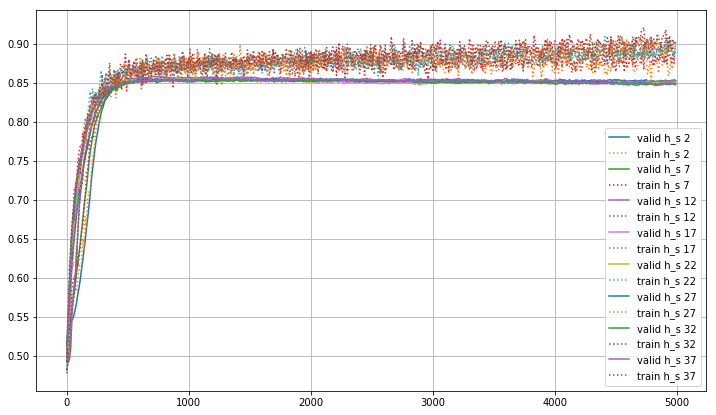

In [83]:
hidden_sizes = range(2, 41, 5)
plt.figure(figsize=(12,7)) 
for i,model in enumerate(models_3):
    m = model.information
    num_iterations = list(m.keys())
    costs = [m[i][0]  for i in num_iterations]
    valid_scores = [m[i][1]  for i in num_iterations]
    train_scores = [m[i][2]  for i in num_iterations]
    plt.plot(num_iterations, valid_scores, '-', label='valid h_s '+ str(hidden_sizes[i]))
    plt.plot(num_iterations, train_scores, ':', label='train h_s '+ str(hidden_sizes[i]))
    plt.yticks(np.arange(0.5, 0.95, 0.05))
    ax = plt.gca()
    ax.grid(True)
    plt.legend()

## 测试多层

In [73]:
models_2 = []
learning_rates = [0.5, 0.3, 0.1]
n_splits = 1
ms = ShuffleSplit(n_splits=n_splits,test_size=0.2)

for train_indices, valid_indices in ms.split(train_X_vec2doc_2):
    for learning_rate in learning_rates:
        train_train_X = train_X.iloc[:,train_indices]
        train_train_Y = train_Y.iloc[train_indices,:]
        train_valid_X = train_X.iloc[:,valid_indices]
        train_valid_Y = train_Y.iloc[valid_indices,:]
        mlpc = MLPClassifier(verbose=False, 
            # 忽略输入和输出层。中间层的结点数。例如 本例子为 input -> 8 -> 4 -> 2（2分类）
            hidden_layer_sizes=(8,4), 
            activation='relu', # 'relu', 'sigmoid'. 更多函数，等待支持
            max_iter=500, # 迭代次数
            learning_rate_init=learning_rate, 
            warm_start=True,  # True就好了
            mini_batch='auto', # 保持auto
            step_size=10, # 多少个iteration后，才进行“输出loss”，输出“准确度”，保存模型文件，这三个操作?
            load_from_file=False, # 读文件恢复模型吗
            dump_file=False, # 要不要把模型写入文件？
            validation_set=(train_valid_X, train_valid_Y) # 要不要给一个validation set？（仅用来输出这个集合的准确度)
        )
        mlpc.fit(train_train_X, train_train_Y)
        r = mlpc.score(train_valid_X, train_valid_Y)
        models_2.append(mlpc)
        print(r)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[0] loss 0.7183283033332956
 - (2018-10-21 02:42:14)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.49666666666666665, training score 0.5020833333333333
 - (2018-10-21 02:42:15)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[10] loss 0.6919228401397827
 - (2018-10-21 02:42:15)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.5152083333333334, training score 0.5223958333333333
 - (2018-10-21 02:42:16)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[20] loss 0.6884875162074316
 - (2018-10-21 02:42:17)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.5775, training score 0.5848958333333333
 - (2018-10-21 02:42:17)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[30] loss 0.680458276155

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.5033333333333333, training score 0.5010416666666667
 - (2018-10-21 02:42:54)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[280] loss 5.66299747786793
 - (2018-10-21 02:42:54)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.5033333333333333, training score 0.5083333333333333
 - (2018-10-21 02:42:55)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[290] loss 5.716987824584409
 - (2018-10-21 02:42:56)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.5033333333333333, training score 0.5036458333333333
 - (2018-10-21 02:42:57)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[300] loss 5.890956719559733
 - (2018-10-21 02:42:57)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation sc

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[50] loss 0.6788366899540981
 - (2018-10-21 02:43:33)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.6379166666666667, training score 0.6515625
 - (2018-10-21 02:43:34)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[60] loss 0.6619900498066312
 - (2018-10-21 02:43:35)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.710625, training score 0.7260416666666667
 - (2018-10-21 02:43:35)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[70] loss 0.6086533536031236
 - (2018-10-21 02:43:36)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.7745833333333333, training score 0.8046875
 - (2018-10-21 02:43:37)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[80] loss 0.5098890275697365
 - (2018-10

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[330] loss 0.2868649102363013
 - (2018-10-21 02:44:13)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8508333333333333, training score 0.8807291666666667
 - (2018-10-21 02:44:14)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[340] loss 0.2673940253919293
 - (2018-10-21 02:44:15)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8491666666666666, training score 0.8911458333333333
 - (2018-10-21 02:44:15)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[350] loss 0.32355527189710676
 - (2018-10-21 02:44:16)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8527083333333333, training score 0.8598958333333333
 - (2018-10-21 02:44:17)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[360] lo

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.569375, training score 0.5807291666666666
 - (2018-10-21 02:44:53)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[110] loss 0.6871172991035747
 - (2018-10-21 02:44:54)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.5747916666666667, training score 0.5864583333333333
 - (2018-10-21 02:44:55)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[120] loss 0.6852248169539313
 - (2018-10-21 02:44:55)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.5904166666666667, training score 0.6020833333333333
 - (2018-10-21 02:44:56)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[130] loss 0.6847710054477392
 - (2018-10-21 02:44:57)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.85375, training score 0.865625
 - (2018-10-21 02:45:33)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[390] loss 0.3145969752370238
 - (2018-10-21 02:45:34)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8533333333333334, training score 0.86875
 - (2018-10-21 02:45:34)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[400] loss 0.3243026736938678
 - (2018-10-21 02:45:35)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8522916666666667, training score 0.8651041666666667
 - (2018-10-21 02:45:36)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[410] loss 0.30234462841939685
 - (2018-10-21 02:45:37)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.8527083333333333, tra

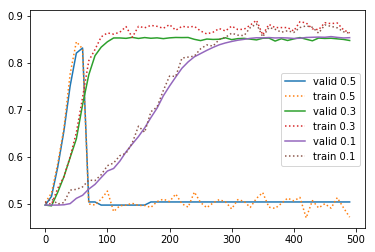

In [75]:
for i,model in enumerate(models_2):
    m = model.information
    num_iterations = list(m.keys())
    costs = [m[i][0]  for i in num_iterations]
    valid_scores = [m[i][1]  for i in num_iterations]
    train_scores = [m[i][2]  for i in num_iterations]
    plt.plot(num_iterations, valid_scores, '-', label='valid '+ str(learning_rates[i]))
    plt.plot(num_iterations, train_scores, ':', label='train '+ str(learning_rates[i]))
    plt.legend()

## 测试单层节点数变化

In [ ]:
## 搏一搏，单车变摩托

## 训练模型

In [89]:
learning_rate = 0.1
hidden_sizes = range(2, 41, 5)
n_splits = 1
train_models_3 = []
for hidden_size in hidden_sizes:
    train_train_X = train_X
    train_train_Y = train_Y
    mlpc = MLPClassifier(verbose=False, 
        # 忽略输入和输出层。中间层的结点数。例如 本例子为 input -> 4 -> 2（2分类）
        hidden_layer_sizes=(hidden_size,), 
        activation='relu', # 'relu', 'sigmoid'. 更多函数，等待支持
        max_iter=500, # 迭代次数
        learning_rate_init=learning_rate, 
        warm_start=True,  # True就好了
        mini_batch='auto', # 保持auto
        step_size=10, # 多少个iteration后，才进行“输出loss”，输出“准确度”，保存模型文件，这三个操作?
        load_from_file=False, # 读文件恢复模型吗
        dump_file=False # 要不要把模型写入文件？
#         validation_set=(train_valid_X, train_valid_Y) # 要不要给一个validation set？（仅用来输出这个集合的准确度)
    )
    mlpc.fit(train_train_X, train_train_Y)
    train_models_3.append(mlpc)
    print(r)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[0] loss 0.7080087584343884
 - (2018-10-21 08:19:54)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[10] loss 0.700091501508774
 - (2018-10-21 08:19:54)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[20] loss 0.6912715123865538
 - (2018-10-21 08:19:55)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[30] loss 0.6864681683673995
 - (2018-10-21 08:19:56)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[40] loss 0.6867264122247102
 - (2018-10-21 08:19:56)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[50] loss 0.6864547081070506
 - (2018-10-21 08:19:57)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[60] loss 0.6846117755504803
 - (2018-10-21 08:19:57)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[70] loss

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[130] loss 0.6256220814733594
 - (2018-10-21 08:20:31)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[140] loss 0.6102175788173466
 - (2018-10-21 08:20:31)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[150] loss 0.6040955572163006
 - (2018-10-21 08:20:32)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[160] loss 0.5720754575706483
 - (2018-10-21 08:20:33)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[170] loss 0.5634505396418726
 - (2018-10-21 08:20:33)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[180] loss 0.5503335279683881
 - (2018-10-21 08:20:34)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[190] loss 0.5381483884472804
 - (2018-10-21 08:20:35)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 


[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[250] loss 0.3948484418127642
 - (2018-10-21 08:21:17)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[260] loss 0.4150284352032748
 - (2018-10-21 08:21:18)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[270] loss 0.40190235971634714
 - (2018-10-21 08:21:19)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[280] loss 0.3803864811534991
 - (2018-10-21 08:21:20)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[290] loss 0.3798512870615907
 - (2018-10-21 08:21:21)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[300] loss 0.3753093768382027
 - (2018-10-21 08:21:22)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[310] loss 0.38310953137802667
 - (2018-10-21 08:21:23)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 -

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[370] loss 0.34782000759514164
 - (2018-10-21 08:22:15)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[380] loss 0.3513914656775021
 - (2018-10-21 08:22:16)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[390] loss 0.3305744777067819
 - (2018-10-21 08:22:17)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[400] loss 0.3375138854046412
 - (2018-10-21 08:22:18)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[410] loss 0.33043629718612694
 - (2018-10-21 08:22:19)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[420] loss 0.34576787183376706
 - (2018-10-21 08:22:20)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[430] loss 0.3464736503770256
 - (2018-10-21 08:22:21)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[490] loss 0.30600743057427987
 - (2018-10-21 08:23:23)

0.8483333333333334
[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[0] loss 0.7640761446496424
 - (2018-10-21 08:23:24)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[10] loss 0.6911250198972151
 - (2018-10-21 08:23:26)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[20] loss 0.6707323045508204
 - (2018-10-21 08:23:27)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[30] loss 0.659771985831847
 - (2018-10-21 08:23:28)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[40] loss 0.6552701297355005
 - (2018-10-21 08:23:29)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[50] loss 0.6367750260668436
 - (2018-10-21 08:23:30)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train 

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[110] loss 0.5162024277121128
 - (2018-10-21 08:24:41)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[120] loss 0.5020856935436835
 - (2018-10-21 08:24:42)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[130] loss 0.4768763456030671
 - (2018-10-21 08:24:43)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[140] loss 0.46905052449587664
 - (2018-10-21 08:24:45)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[150] loss 0.4665175227002987
 - (2018-10-21 08:24:46)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[160] loss 0.46784582153163673
 - (2018-10-21 08:24:47)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[170] loss 0.4492173472575801
 - (2018-10-21 08:24:49)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 -

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[230] loss 0.4003907256168335
 - (2018-10-21 08:26:07)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[240] loss 0.4022811617793253
 - (2018-10-21 08:26:08)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[250] loss 0.39371717477462
 - (2018-10-21 08:26:09)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[260] loss 0.4036353402007165
 - (2018-10-21 08:26:11)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[270] loss 0.38789490311986524
 - (2018-10-21 08:26:12)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[280] loss 0.38492002896806415
 - (2018-10-21 08:26:14)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[290] loss 0.3857975233068653
 - (2018-10-21 08:26:15)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 


In [92]:
for i,model in enumerate(train_models_3):
    p = model.predict(test_X)
    result = pd.DataFrame(i[0] for i in p)
    result.to_csv('../results/'+'doc2vec-nn-'+str(hidden_sizes[i])+ str(datetime.datetime.now().strftime("%Y-%m-%d-%H-%M")) + ".csv", index=0, header=None, index_label=None)

In [93]:
learning_rates = [0.08, 0.09, 0.10, 0.11, 0.12, 0.13,0.14]
hidden_size = 5
n_splits = 1
train_models_lr = []
for learning_rate in learning_rates:
    train_train_X = train_X
    train_train_Y = train_Y
    mlpc = MLPClassifier(verbose=False, 
        # 忽略输入和输出层。中间层的结点数。例如 本例子为 input -> 4 -> 2（2分类）
        hidden_layer_sizes=(hidden_size,), 
        activation='relu', # 'relu', 'sigmoid'. 更多函数，等待支持
        max_iter=500, # 迭代次数
        learning_rate_init=learning_rate, 
        warm_start=True,  # True就好了
        mini_batch='auto', # 保持auto
        step_size=10, # 多少个iteration后，才进行“输出loss”，输出“准确度”，保存模型文件，这三个操作?
        load_from_file=False, # 读文件恢复模型吗
        dump_file=False # 要不要把模型写入文件？
#         validation_set=(train_valid_X, train_valid_Y) # 要不要给一个validation set？（仅用来输出这个集合的准确度)
    )
    mlpc.fit(train_train_X, train_train_Y)
    train_models_lr.append(mlpc)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[0] loss 0.7694679780598724
 - (2018-10-21 08:48:25)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[10] loss 0.7345324878885874
 - (2018-10-21 08:48:25)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[20] loss 0.71318875758706
 - (2018-10-21 08:48:26)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[30] loss 0.7048162258659405
 - (2018-10-21 08:48:27)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[40] loss 0.7000804109491505
 - (2018-10-21 08:48:27)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[50] loss 0.6958537697519543
 - (2018-10-21 08:48:28)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[60] loss 0.6952798008643724
 - (2018-10-21 08:48:28)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[70] loss 

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[130] loss 0.6827463697423055
 - (2018-10-21 08:49:05)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[140] loss 0.6813749371847716
 - (2018-10-21 08:49:06)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[150] loss 0.6793610683973471
 - (2018-10-21 08:49:06)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[160] loss 0.674780758413523
 - (2018-10-21 08:49:07)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[170] loss 0.6728999943257644
 - (2018-10-21 08:49:08)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[180] loss 0.6722112545846455
 - (2018-10-21 08:49:08)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[190] loss 0.6645735942583235
 - (2018-10-21 08:49:09)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[260] loss 0.5836018056317396
 - (2018-10-21 08:49:45)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[270] loss 0.5678122138950857
 - (2018-10-21 08:49:46)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[280] loss 0.5557957621937768
 - (2018-10-21 08:49:47)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[290] loss 0.5249265077355587
 - (2018-10-21 08:49:47)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[300] loss 0.5163064238827421
 - (2018-10-21 08:49:48)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[310] loss 0.4922938785483267
 - (2018-10-21 08:49:49)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[320] loss 0.4849677698824807
 - (2018-10-21 08:49:49)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 


[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[380] loss 0.39626915857437317
 - (2018-10-21 08:50:25)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[390] loss 0.3634463645686386
 - (2018-10-21 08:50:26)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[400] loss 0.37104841687131956
 - (2018-10-21 08:50:26)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[410] loss 0.36404840374531205
 - (2018-10-21 08:50:27)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[420] loss 0.3593794970677378
 - (2018-10-21 08:50:28)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[430] loss 0.36099179022743205
 - (2018-10-21 08:50:28)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[440] loss 0.34025103384287975
 - (2018-10-21 08:50:29)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 20

0.8483333333333334
[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[0] loss 0.7694679780598724
 - (2018-10-21 08:51:05)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[10] loss 0.7223299902373885
 - (2018-10-21 08:51:05)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[20] loss 0.7036318009295991
 - (2018-10-21 08:51:06)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[30] loss 0.6966225184820998
 - (2018-10-21 08:51:07)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[40] loss 0.6939832019836213
 - (2018-10-21 08:51:07)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[50] loss 0.6904178276460764
 - (2018-10-21 08:51:08)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[60] loss 0.6890834654552055
 - (2018-10-21 08:51:08)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train l

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[120] loss 0.6687955723261362
 - (2018-10-21 08:51:44)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[130] loss 0.6624293447556545
 - (2018-10-21 08:51:45)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[140] loss 0.6543026227452859
 - (2018-10-21 08:51:45)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[150] loss 0.643735270895029
 - (2018-10-21 08:51:46)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[160] loss 0.6238492726576016
 - (2018-10-21 08:51:47)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[170] loss 0.6061427199222442
 - (2018-10-21 08:51:47)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[180] loss 0.5966554263059739
 - (2018-10-21 08:51:48)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[

In [94]:
for i,model in enumerate(train_models_lr):
    p = model.predict(test_X)
    result = pd.DataFrame(i[0] for i in p)
    result.to_csv('../results/'+'doc2vec-nn-5-'+str(learning_rates[i])+ str(datetime.datetime.now().strftime("%Y-%m-%d-%H-%M")) + ".csv", index=0, header=None, index_label=None)